In [ ]:
# Notes:
# Need to revisit facebook area, figure out how to use glob to loop 
# through the whole list of folders and create seperate dataframes
# loop through all data frames to perform calculations
# then loop through all to create charts

# Twitter Mining Function
---------------------------------------------------------------
## Searches, Stores, and Produce Outputs In The Form Of DataFrames and CSV Files.

### Run each cell one at a time, and follow the next instruction:

In [1]:
# Import Dependencies
%matplotlib notebook
import os
import csv
import json
import requests
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from twython import Twython
import simplejson
import sys
import string
import glob
from pathlib import Path

In [2]:
# Import Twitter 'Keys' - MUST SET UP YOUR OWN 'config_twt.py' file
from config_twt import (app_key_twt, app_secret_twt, oauth_token_twt, oauth_token_secret_twt)

In [3]:
# Set Up Consumer Keys And Secret with Twitter Keys
APP_KEY = app_key_twt
APP_SECRET = app_secret_twt

# Set up OAUTH Token and Secret With Twitter Keys

OAUTH_TOKEN = oauth_token_twt
OAUTH_TOKEN_SECRET = oauth_token_secret_twt

# Load Keys In To a Twython Function And Call It "twitter"
twitter = Twython(APP_KEY, APP_SECRET, OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

# Setup Batch Counter For Phase 2
batch_counter = 0

___________________________
## Twitter Mining Function '(TMF)'
___________________________

### INSTRUCTIONS:


This will Twitter Query Function will:
- Perform searches for hastags (#)
- Search for "@twitter_user_acct"
- Provide mixed results of popular and most recent tweets from the last 7 days
- 'remaining' 'search/tweets (allowance of 180) rate limit status' regenerates in 15 minutes after depletion

### Final outputs are aggegrated queries in both:

- Pandas DataFrame of queried tweets
- CSV files saved in the same folder as this Jupyter Notebook


### Phase 1 - Run Query and Store The Dictionary Into a List


- Step 1) Run the 'Twitter Mining Function' cell below to begin program
            Note:
                - Limits have not been fully tested due to time constraint
                - Search up to 180 queries where and each query yields up to 100 tweets max
                - Running the TLC to see how many you have left after every csv outputs.

- Step 2) When prompted, input in EITHER: #hashtag or  @Twitter_user_account
            Examples: "#thuglife" or "@beyonce"

- Step 3) TMF will query Twitter and store the tweets_data, a list called "all_data"

- Step 4) Upon query search completion, it will prompt: "Perform another search query:'  ('y'/'n')  "
            - Input 'y' to query, and the program will append the results
            - Tip: Keep count of how many 'search tweets' you have, it should deduct 1 from 'remaining',
                    which can produce up to 100 tweets of data
                    
- Step 5) End program by entering 'n' when prompted for 'search again'
            Output: printed list of all appended query data


### Phase 2 - Converting to Pandas DataFrame and Produce a CSV Output

- Step 6) Loop Through Queried Data 

- Step 7) Convert to Pandas DataFrame

- Step 8) Convert from DataFrame to CSV

### Addtional Considerations:

- Current set up uses standard search api keys, not premium
- TMF returns potentially 100 tweets at a time, and pulls from the last 7 days in random order
- More than likely will have to run multiple searches and track line items count
    in each of the csv files output that will be created in the same folder


### Tweet Limit Counter (TLC)
    - Run cell to see how many search queries you have available
    - Your 'remaining' search tweets regenerates over 15 minutes.

In [ ]:
# TLC - Run to Query Current Rate Limit on API Keys    
twitter.get_application_rate_limit_status()['resources']['search']

In [ ]:
#Twitter Mining Function (TMF)
#RUN THIS CELL TO BEGIN PROGRAM!

print('-'*80)
print("TWITTER QUERY FUNCTION - BETA")
print('-'*80)
print("INPUT PARAMETERS:")
print("- @Twitter_User_Account e.g. @clashofclans")
print("- Hashtags (#) e.g. #THUGLIFE")
print()
print("NOTE: SCROLL DOWN AFTER EACH QUERY FOR ENTER INPUT")
print('-'*80)

def twitter_search(app_search):
        # Store the following Twython function and parameters into variable 't'
        t = Twython(app_key=APP_KEY,
                   app_secret=APP_SECRET,
                   oauth_token=OAUTH_TOKEN,
                   oauth_token_secret=OAUTH_TOKEN_SECRET)
        # The Twitter Mining Function we will use to run searches is below
        # and we're asking for it to pull 100 tweets
        search = t.search(q=app_search, count=100)
        tweets = search['statuses']
        
    # This will be a list of dictionaries of each tweet where the loop below will append to
        all_data = []

    # From the tweets, go into each individual tweet and extract the following into a 'dictionary'
    # and append it to big bucket called 'all_data'
        for tweet in tweets:
            try:
                tweets_data = {
                    "Created At":tweet['created_at'],
                    "Text (Tweet)":tweet['text'],
                    "User ID":tweet['user']['id'],
                    "User Followers Count":tweet['user']['followers_count'],
                    "Screen Name":tweet['user']['name'],
                     "ReTweet Count":tweet['retweet_count'],
                     "Favorite Count":tweet['favorite_count']
                }
                all_data.append(tweets_data)
                #print(tweets_data)
                #print()
            except (KeyError, NameError, TypeError, AttributeError) as err:      
                print(f"{err}    Skipping...")
                #functions need to return something...
        return all_data

# The On and Off Mechanisms:
search_again = 'y'
final_all_data = []

# initialize the query counter
query_counter = 0
while search_again == 'y':
    query_counter += 1
    print()
    start_program = str(input('Type the EXACT @twitter_acct or #hashtag to query:   '))
    all_data = twitter_search(start_program)
    final_all_data += all_data
    print()
    #print(all_data)
    print(f"Completed Collecting Search Results for {start_program} . Queries Completed: {query_counter} ")
    print('-'*80)
    search_again = input("Would you like to run another query? Enter 'y'. Otherwise, 'n' or another response will end query mode. ")
    print('-'*80)
# When you exit the program, set the query counter back to zero
query_counter = 0
print()
print(f"Phase 1 of 2 Queries Completed . Proceed to Phase 2 - Convert Collection to DF and CSV formats .")
#print("final Data", final_all_data)
#####################################################################################################
# TIPS!: # If you're searching for the same hastag or twitter_handle,
         # consider copying and pasting it (e.g. @fruitninja)

In [ ]:
# Display the total tweets the TMF successfully pulled:
print(len(final_all_data))

### Tweet Limit Counter (TLC)
    - Run cell to see how many search queries you have available
    - Your 'remaining' search tweets regenerates over 15 minutes.

In [ ]:
# Run to view current rate limit status
twitter.get_application_rate_limit_status()['resources']['search']

In [ ]:
#df = pd.DataFrame(final_all_data[0])
#df

final_all_data

### Step 6) Loop through the stored list of queried tweets from final_all_data and stores in designated lists

In [ ]:
# Loop thru finall_all_data (list of dictionaries) and extract each item and store them into
# the respective lists

# BUCKETS
created_at = []
tweet_text = []
user_id = []
user_followers_count = []
screen_name = []
retweet_count = []
likes_count = []

# append tweets data to the buckets for each tweet
#change to final_all_data
for data in final_all_data:
        #print(keys, data[keys])
        
    created_at.append(data["Created At"]),
    tweet_text.append(data['Text (Tweet)']),
    user_id.append(data['User ID']),
    user_followers_count.append(data['User Followers Count']),
    screen_name.append(data['Screen Name']),
    retweet_count.append(data['ReTweet Count']),
    likes_count.append(data['Favorite Count'])


#print(created_at, tweet_text, user_id, user_followers_count, screen_name, retweet_count, likes_count)

print("Run complete. Proceed to next cell.")

### Step 7) Convert to Pandas DataFrame

In [ ]:
# Setup DataFrame and run tweets_data_df

tweets_data_df = pd.DataFrame({
    "Created At": created_at,
    "Screen Name": screen_name,
    "User ID": user_id,
    "User Follower Count": user_followers_count,
    "Likes Counts": likes_count,
    "ReTweet Count": retweet_count,
    "Tweet Text" : tweet_text
})
tweets_data_df

### Step 8) Convert DataFrame to CSV File

In [ ]:
# Save Tweets Data to a CSV File (Run Cell to input filename)
# Streamline the saving of multiple queries (1 query = up to 100 tweets) into a csv file.

# E.g. input = (#fruit_ninja) will save the file as "fruit_ninja_batch1.csv" as the file result
# Note: first chracter will be slice off so you can just copy and paste
# the hastag / @twitter_handle from steps above
batch_name = str(input("Enter in batch name."))

# If you restart kernel, batch_counter resets to zero.
batch_counter = batch_counter +1

# Check if the #hastag / @twitter_handle folder exists and create the folder if it does not
Path(f"./resources/{batch_name[1:]}").mkdir(parents=True, exist_ok=True)

# Save dataframe of all queries in a csv file to a folder in the resources folder csv using the 
tweets_data_df.to_csv(f"./resources/{batch_name[1:]}/{batch_name[1:]}_batch{batch_counter}.csv", encoding='utf-8')
print(f"Output saved in current folder as: {batch_name[1:]}_batch{batch_counter}.csv ")

# PHASE 3 -  CALCULATIONS USING API DATA


In [ ]:
# Example Template of looping thru csvfiles, will replicate these cells

path = './resources/thuglife_files' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
frame

In [ ]:
path = './resources/*' # use your path
resources = glob.glob(path)

li = []

#for foldername in enumerate(resources):
print("All folders in the 'resources' folder:")
print("="*40)
for foldername in resources:
    li.append(foldername)
    str(foldername)
    print(foldername[12:])
#print(li)
print("")
print(F"Total Folders: {len(li)}")

##### Facebook Calculations


In [4]:
# Example Template of looping thru csvfiles, and concatenate all of the csv files we collected in each folder
path = './resources/facebook'
all_files = glob.glob(path + "/*.csv")
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
fb_frame = pd.concat(li, axis=0, ignore_index=True)
fb_frame

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
0,0,Wed Apr 03 19:43:36 +0000 2019,La veille techno,135145900,10071,0,0,RT @nicoladiaz FYI @Hugoslav @edwyplenel @Disc...
1,1,Wed Apr 03 19:43:32 +0000 2019,John Kreuzer,15877403,2923,0,0,If it weren't for constant #Facebook security ...
2,2,Wed Apr 03 19:43:24 +0000 2019,CyberTeam,1031930290363662342,128,0,0,Over 540 Milion Facebook User Records Found On...
3,3,Wed Apr 03 19:43:10 +0000 2019,Jonathan Alvizua,177250563,555,0,1,RT @Economiahoymx: #ATENCIÓN | Cultura Colecti...
4,4,Wed Apr 03 19:43:05 +0000 2019,Swati Khandelwal,864777798,30039,0,0,😱 Over 540 Million #Facebook User Records Expo...
5,5,Wed Apr 03 19:42:35 +0000 2019,Paul Motion,42687750,451,0,108,RT @threatpost: Breaking: Hundreds of millions...
6,6,Wed Apr 03 19:42:02 +0000 2019,TechFood,952518796266401793,5520,0,0,ICO hints at Facebook hypocrisy over data prot...
7,7,Wed Apr 03 19:41:48 +0000 2019,Noticieros GREM,260370353,18771,0,0,#Empresas🔎 Hallan datos de #Facebook en #Amazo...
8,8,Wed Apr 03 19:41:41 +0000 2019,PRSA SF Bay Area,68763408,1828,0,0,"""#Facebook exists to create community and we d..."
9,9,Wed Apr 03 19:41:33 +0000 2019,BuyDirectSports Sports Picks & Predictions,267990789,3136,0,0,That makes 9 Straight #FreePick #Winners @Buyd...


In [5]:
fb_frame.describe()


,Unnamed: 0,User ID,User Follower Count,Likes Counts,ReTweet Count
count,5102.000000,5.102000e+03,5102.000000,5102.000000,5102.000000
mean,650.819287,2.654058e+17,6957.946884,0.314387,183.822619
std,389.521660,4.214586e+17,44160.860710,2.298868,556.649980
min,0.000000,6.637300e+04,0.000000,0.000000,0.000000
25%,318.250000,1.315201e+08,107.000000,0.000000,0.000000
50%,637.000000,1.236133e+09,371.000000,0.000000,4.000000
75%,956.000000,7.616781e+17,1650.000000,0.000000,58.000000
max,1484.000000,1.113193e+18,548840.000000,41.000000,2755.000000


In [6]:
# Sort to set up removal of duplicates
fb_frame.sort_values(by=['User ID','Created At'], ascending=False)

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
2510,43,Wed Apr 03 17:10:25 +0000 2019,IRAN FLOOD RELIEF,1113192566273531908,9,0,0,@Cristiano \n@juventusfcen \n@FCBarcelona \n@F...
2592,125,Wed Apr 03 17:10:25 +0000 2019,IRAN FLOOD RELIEF,1113192566273531908,9,0,0,@Cristiano \n@juventusfcen \n@FCBarcelona \n@F...
2675,208,Wed Apr 03 17:10:25 +0000 2019,IRAN FLOOD RELIEF,1113192566273531908,9,0,0,@Cristiano \n@juventusfcen \n@FCBarcelona \n@F...
2761,294,Wed Apr 03 17:10:25 +0000 2019,IRAN FLOOD RELIEF,1113192566273531908,9,0,0,@Cristiano \n@juventusfcen \n@FCBarcelona \n@F...
2846,379,Wed Apr 03 17:10:25 +0000 2019,IRAN FLOOD RELIEF,1113192566273531908,9,0,0,@Cristiano \n@juventusfcen \n@FCBarcelona \n@F...
2931,464,Wed Apr 03 17:10:25 +0000 2019,IRAN FLOOD RELIEF,1113192566273531908,9,0,0,@Cristiano \n@juventusfcen \n@FCBarcelona \n@F...
3017,550,Wed Apr 03 17:10:25 +0000 2019,IRAN FLOOD RELIEF,1113192566273531908,9,0,0,@Cristiano \n@juventusfcen \n@FCBarcelona \n@F...
3102,635,Wed Apr 03 17:10:25 +0000 2019,IRAN FLOOD RELIEF,1113192566273531908,9,0,0,@Cristiano \n@juventusfcen \n@FCBarcelona \n@F...
3187,720,Wed Apr 03 17:10:25 +0000 2019,IRAN FLOOD RELIEF,1113192566273531908,9,0,0,@Cristiano \n@juventusfcen \n@FCBarcelona \n@F...
3273,806,Wed Apr 03 17:10:25 +0000 2019,IRAN FLOOD RELIEF,1113192566273531908,9,0,0,@Cristiano \n@juventusfcen \n@FCBarcelona \n@F...


In [7]:
# Drop Duplicates only for matching columns omitting the index
facebook_filtered_df = fb_frame.drop_duplicates(['Created At', 'Screen Name', 'User ID', 'User Follower Count', 'Likes Counts', 'ReTweet Count', 'Tweet Text']).sort_values(by=['User ID','Created At'], ascending=False)

In [8]:
# Get New Snap Shot Statistics
facebook_filtered_df.describe()

,Unnamed: 0,User ID,User Follower Count,Likes Counts,ReTweet Count
count,834.000000,8.340000e+02,834.000000,834.000000,834.000000
mean,416.143885,2.782046e+17,10212.504796,0.848921,373.279376
std,416.280360,4.284004e+17,62249.253036,4.799580,809.999425
min,0.000000,6.637300e+04,0.000000,0.000000,0.000000
25%,52.000000,1.470639e+08,106.250000,0.000000,2.000000
50%,240.000000,1.269394e+09,294.000000,0.000000,43.000000
75%,822.250000,7.812809e+17,1356.000000,0.000000,117.000000
max,1482.000000,1.113193e+18,548840.000000,41.000000,2755.000000


In [9]:
facebook_filtered_df.head()

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
2510,43,Wed Apr 03 17:10:25 +0000 2019,IRAN FLOOD RELIEF,1113192566273531908,9,0,0,@Cristiano \n@juventusfcen \n@FCBarcelona \n@F...
1981,496,Wed Apr 03 03:48:02 +0000 2019,Ati Shong Thonger,1112576649948774400,0,0,0,@anthonydelva1 @dreeashy @facebook 28th of Mar...
87,87,Wed Apr 03 19:35:59 +0000 2019,DeAnna Hernandez,1112524336966131713,4,0,0,#cbdismything #cbdoil #cbdeanna #pure #Potent ...
34,34,Wed Apr 03 19:39:50 +0000 2019,Juliet Rose,1112033927575810049,15,0,117,RT @TheHackersNews: 😱 Over 540 Million #Facebo...
232,232,Wed Apr 03 19:39:50 +0000 2019,Juliet Rose,1112033927575810049,15,0,118,RT @TheHackersNews: 😱 Over 540 Million #Facebo...


In [10]:
# Count total out of Unique Tweets
facebook_total_tweets = len(facebook_filtered_df['Tweet Text'])
facebook_total_tweets

834

In [11]:
# Calculate Facebook Avg Followers - doesn't make sense to sum.
facebook_avg_followers_ct = facebook_filtered_df['User Follower Count'].mean()
facebook_avg_followers_ct

10212.50479616307

In [12]:
# Total Likes of all tweets
facebook_total_likes = facebook_filtered_df['Likes Counts'].sum()
#facebook_avg_likes = facebook_filtered_df['Likes Counts'].mean()
facebook_total_likes
#facebook_avg_likes

708

In [13]:
# Facebook Retweets Stats:
#facebook_sum_retweets = facebook_filtered_df['ReTweet Count'].sum()
facebook_avg_retweets = facebook_filtered_df['ReTweet Count'].mean()
#facebook_sum_retweets
facebook_avg_retweets

373.27937649880096

#### Instagram Calculations

In [14]:
path = './resources/instagram'
all_files = glob.glob(path + "/*.csv")
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
instagram_source_df = pd.concat(li, axis=0, ignore_index=True)
instagram_source_df

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
0,0,Wed Apr 03 17:46:57 +0000 2019,matilda urrea-berm.,52971889,10,0,0,@GWR @instagram Nice do you get a plaque?
1,1,Wed Apr 03 17:46:35 +0000 2019,BAD WAI 🌎BE WATER 😉 MY FRIEND 🤟,143771117,13232,1,0,@TamaraVila83 @EstasTamara @CDRReus @CDRCatOfi...
2,2,Wed Apr 03 17:46:14 +0000 2019,Francesca,718914757,178,0,0,@instagram this new algorithm is awful and mak...
3,3,Wed Apr 03 17:46:06 +0000 2019,Silverlinings,1088936582609014784,18,0,0,@RichJC1001 @GWR @instagram She isnt trying to...
4,4,Wed Apr 03 17:46:01 +0000 2019,rosella north,1113491398819569665,0,0,549,RT @marcuslemonis: Join me on @instagram @marc...
5,5,Wed Apr 03 17:45:58 +0000 2019,🎮 Flibbley NovA 🎮,54262136,114,0,0,@TortimerTheGrey @instagram Aww so cute!!
6,6,Wed Apr 03 17:45:56 +0000 2019,jacovaggio,2522432237,378,0,0,@instagram fix your app
7,7,Wed Apr 03 17:45:53 +0000 2019,CLAPPERS,910634139753226240,39,0,0,"@instagram Hello IG, my main account (Clappers..."
8,8,Wed Apr 03 17:45:50 +0000 2019,MadLove.tv,2358484082,563,0,0,@snohaalegra @Brittanysky @TIDAL @AyishaDiaz @...
9,9,Wed Apr 03 17:45:46 +0000 2019,Uncle Moon,909132428513546241,120,0,532,RT @GWR: Congratulations to the Duke and Duche...


In [15]:
# Snapshot Statistics
instagram_source_df.describe()

,Unnamed: 0,User ID,User Follower Count,Likes Counts,ReTweet Count
count,3158.000000,3.158000e+03,3158.000000,3158.000000,3158.000000
mean,1057.600697,2.973860e+17,24434.236225,0.806840,37.960101
std,748.279004,4.401682e+17,101565.229508,1.549334,132.480916
min,0.000000,1.490329e+07,0.000000,0.000000,0.000000
25%,394.250000,1.286329e+08,89.000000,0.000000,0.000000
50%,920.500000,9.442872e+08,432.000000,0.000000,0.000000
75%,1709.750000,8.124180e+17,4045.000000,1.000000,1.000000
max,2499.000000,1.113492e+18,521137.000000,6.000000,549.000000


In [16]:
instagram_source_df.head()

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
0,0,Wed Apr 03 17:46:57 +0000 2019,matilda urrea-berm.,52971889,10,0,0,@GWR @instagram Nice do you get a plaque?
1,1,Wed Apr 03 17:46:35 +0000 2019,BAD WAI 🌎BE WATER 😉 MY FRIEND 🤟,143771117,13232,1,0,@TamaraVila83 @EstasTamara @CDRReus @CDRCatOfi...
2,2,Wed Apr 03 17:46:14 +0000 2019,Francesca,718914757,178,0,0,@instagram this new algorithm is awful and mak...
3,3,Wed Apr 03 17:46:06 +0000 2019,Silverlinings,1088936582609014784,18,0,0,@RichJC1001 @GWR @instagram She isnt trying to...
4,4,Wed Apr 03 17:46:01 +0000 2019,rosella north,1113491398819569665,0,0,549,RT @marcuslemonis: Join me on @instagram @marc...


In [17]:
# Sort to set up removal of duplicates
instagram_source_df.sort_values(by=['User ID','Created At'], ascending=False)

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
34,34,Wed Apr 03 17:41:38 +0000 2019,tamica demartino,1113492484968075265,0,0,549,RT @marcuslemonis: Join me on @instagram @marc...
134,134,Wed Apr 03 17:41:38 +0000 2019,tamica demartino,1113492484968075265,0,0,549,RT @marcuslemonis: Join me on @instagram @marc...
234,234,Wed Apr 03 17:41:38 +0000 2019,tamica demartino,1113492484968075265,0,0,549,RT @marcuslemonis: Join me on @instagram @marc...
334,334,Wed Apr 03 17:41:38 +0000 2019,tamica demartino,1113492484968075265,0,0,549,RT @marcuslemonis: Join me on @instagram @marc...
435,435,Wed Apr 03 17:41:38 +0000 2019,tamica demartino,1113492484968075265,0,0,549,RT @marcuslemonis: Join me on @instagram @marc...
536,536,Wed Apr 03 17:41:38 +0000 2019,tamica demartino,1113492484968075265,0,0,549,RT @marcuslemonis: Join me on @instagram @marc...
636,636,Wed Apr 03 17:41:38 +0000 2019,tamica demartino,1113492484968075265,0,0,549,RT @marcuslemonis: Join me on @instagram @marc...
736,736,Wed Apr 03 17:41:38 +0000 2019,tamica demartino,1113492484968075265,0,0,549,RT @marcuslemonis: Join me on @instagram @marc...
836,836,Wed Apr 03 17:41:38 +0000 2019,tamica demartino,1113492484968075265,0,0,549,RT @marcuslemonis: Join me on @instagram @marc...
936,936,Wed Apr 03 17:41:38 +0000 2019,tamica demartino,1113492484968075265,0,0,549,RT @marcuslemonis: Join me on @instagram @marc...


In [18]:
# Drop Duplicates only for matching columns omitting the index
instagram_filtered_df = instagram_source_df.drop_duplicates(['Created At', 'Screen Name', 'User ID', 'User Follower Count', 'Likes Counts', 'ReTweet Count', 'Tweet Text']).sort_values(by=['User ID','Created At'], ascending=False)

In [19]:
instagram_filtered_df

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
34,34,Wed Apr 03 17:41:38 +0000 2019,tamica demartino,1113492484968075265,0,0,549,RT @marcuslemonis: Join me on @instagram @marc...
1739,1739,Wed Apr 03 17:41:38 +0000 2019,tamica demartino,1113492484968075265,0,0,548,RT @marcuslemonis: Join me on @instagram @marc...
50,50,Wed Apr 03 17:37:58 +0000 2019,ricarda pease,1113492397659267072,0,0,549,RT @marcuslemonis: Join me on @instagram @marc...
4,4,Wed Apr 03 17:46:01 +0000 2019,rosella north,1113491398819569665,0,0,549,RT @marcuslemonis: Join me on @instagram @marc...
1709,1709,Wed Apr 03 17:46:01 +0000 2019,rosella north,1113491398819569665,0,0,548,RT @marcuslemonis: Join me on @instagram @marc...
26,26,Wed Apr 03 17:43:09 +0000 2019,senaida yajima,1113489772503130112,0,0,549,RT @marcuslemonis: Join me on @instagram @marc...
1731,1731,Wed Apr 03 17:43:09 +0000 2019,senaida yajima,1113489772503130112,0,0,548,RT @marcuslemonis: Join me on @instagram @marc...
2551,51,Wed Apr 03 22:16:53 +0000 2019,"Eastjavasurfcamp,Art&Culture",1113469862158905344,0,0,0,Contact number :\nWhastaap : +6281236192026\nE...
2100,2100,Wed Apr 03 17:48:40 +0000 2019,Iomlan Sunnd Therapies,1111590595288539136,18,0,0,"Iomlan Sunnd Therapies, now on @Twitter, @face..."
2517,17,Wed Apr 03 22:23:21 +0000 2019,Christina D 👨‍👩‍👧🌻🐶,1100197005966655489,2802,0,17,RT @BriannaHigdon: Instagram follow train😍\n\n...


In [20]:
# Get New Snap Shot Statistics
instagram_filtered_df.describe()

,Unnamed: 0,User ID,User Follower Count,Likes Counts,ReTweet Count
count,195.000000,1.950000e+02,195.000000,195.000000,195.000000
mean,198.220513,3.298307e+17,32555.861538,0.728205,38.148718
std,459.693912,4.576026e+17,120194.595519,1.496723,131.269077
min,0.000000,1.490329e+07,0.000000,0.000000,0.000000
25%,24.000000,1.317113e+08,107.000000,0.000000,0.000000
50%,48.000000,1.421939e+09,484.000000,0.000000,0.000000
75%,79.500000,8.768142e+17,3195.000000,1.000000,1.000000
max,2400.000000,1.113492e+18,521137.000000,6.000000,549.000000


In [21]:
# Count total out of Unique Tweets
instagram_total_tweets = len(instagram_filtered_df['Tweet Text'])
instagram_total_tweets

195

In [22]:
# Calculate Facebook Avg Followers - doesn't make sense to sum.
instagram_avg_followers_ct = instagram_filtered_df['User Follower Count'].mean()
instagram_avg_followers_ct

32555.861538461537

In [23]:
# Total Likes of all tweets
instagram_total_likes = instagram_filtered_df['Likes Counts'].sum()
#instagram_avg_likes = instagram_filtered_df['Likes Counts'].mean()
instagram_total_likes
#instagram_avg_likes

142

In [24]:
# Retweets Stats:
#instagram_sum_retweets = instagram_filtered_df['ReTweet Count'].sum()
instagram_avg_retweets = instagram_filtered_df['ReTweet Count'].mean()
#instagram_sum_retweets
instagram_avg_retweets

38.14871794871795

### Clash of Clans Calculations

In [25]:
plug = 'clashofclans'
path = f'./resources/{plug}'
all_files = glob.glob(path + "/*.csv")
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
coc_source_df = pd.concat(li, axis=0, ignore_index=True)
coc_source_df

# Snapshot Statistics
coc_source_df.describe()


,Unnamed: 0,User ID,User Follower Count,Likes Counts,ReTweet Count
count,8400.000000,8.400000e+03,8400.000000,8400.000000,8400.000000
mean,468.547619,6.174391e+17,1171.265119,0.532857,5.140357
std,448.828253,4.756433e+17,4200.926735,3.102429,20.483632
min,0.000000,2.006770e+07,0.000000,0.000000,0.000000
25%,161.000000,2.896023e+09,5.000000,0.000000,0.000000
50%,336.000000,8.235135e+17,62.000000,0.000000,0.000000
75%,571.000000,1.049737e+18,474.000000,0.000000,3.000000
max,1999.000000,1.113542e+18,38102.000000,50.000000,185.000000


In [26]:
coc_source_df.head()

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
0,0,Wed Apr 03 23:11:19 +0000 2019,Jual Gems COC,2362332451,9249,0,0,Gems Clash of Clans Cheat Guide ##ClashOfClans
1,1,Wed Apr 03 23:03:09 +0000 2019,EliteWar CLUB ⭐,947082753664868352,1460,0,0,Los mejores trucos para ganar en #ClashOfClans...
2,2,Wed Apr 03 22:52:05 +0000 2019,SNT ELITE,1061211720818003968,57,0,8,RT @CWCFR: Ne ratez pas Dimanche 7 avril de 16...
3,3,Wed Apr 03 22:43:40 +0000 2019,Juan Carlos,1112997949334851584,5,0,1,RT @JuanCar50259285: #ClashOfClans ☠️ https://...
4,4,Wed Apr 03 22:43:18 +0000 2019,Juan Carlos,1112997949334851584,5,0,1,RT @JuanCar50259285: #ClashOfClans😁 https://t....


In [27]:
# Sort to set up removal of duplicates
coc_source_df.sort_values(by=['User ID','Created At'], ascending=False)

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
239,39,Wed Apr 03 20:49:28 +0000 2019,Aaron,1113541776596504578,0,0,0,@ClashofClans Can we have the old animations b...
339,139,Wed Apr 03 20:49:28 +0000 2019,Aaron,1113541776596504578,0,0,0,@ClashofClans Can we have the old animations b...
439,239,Wed Apr 03 20:49:28 +0000 2019,Aaron,1113541776596504578,0,0,0,@ClashofClans Can we have the old animations b...
1038,38,Wed Apr 03 20:49:28 +0000 2019,Aaron,1113541776596504578,0,0,0,@ClashofClans Can we have the old animations b...
1138,138,Wed Apr 03 20:49:28 +0000 2019,Aaron,1113541776596504578,0,0,0,@ClashofClans Can we have the old animations b...
1238,238,Wed Apr 03 20:49:28 +0000 2019,Aaron,1113541776596504578,0,0,0,@ClashofClans Can we have the old animations b...
1338,338,Wed Apr 03 20:49:28 +0000 2019,Aaron,1113541776596504578,0,0,0,@ClashofClans Can we have the old animations b...
2538,38,Wed Apr 03 20:49:28 +0000 2019,Aaron,1113541776596504578,0,0,0,@ClashofClans Can we have the old animations b...
2638,138,Wed Apr 03 20:49:28 +0000 2019,Aaron,1113541776596504578,0,0,0,@ClashofClans Can we have the old animations b...
2738,238,Wed Apr 03 20:49:28 +0000 2019,Aaron,1113541776596504578,0,0,0,@ClashofClans Can we have the old animations b...


In [28]:
# Drop Duplicates only for matching columns omitting the index
coc_filtered_df = coc_source_df.drop_duplicates(['Created At', 'Screen Name', 'User ID', 'User Follower Count', 'Likes Counts', 'ReTweet Count', 'Tweet Text']).sort_values(by=['User ID','Created At'], ascending=False)

In [29]:
coc_filtered_df.head()

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
239,39,Wed Apr 03 20:49:28 +0000 2019,Aaron,1113541776596504578,0,0,0,@ClashofClans Can we have the old animations b...
4312,12,Wed Apr 03 16:52:08 +0000 2019,BalveerSingh,1113440785465270274,0,0,0,@SumitmMallabade @Swapnil3005 @FighterPune @Cl...
4367,67,Wed Apr 03 14:03:12 +0000 2019,BalveerSingh,1113440785465270274,0,0,0,@ClashofClans Hey supercell my game is not wor...
4362,62,Wed Apr 03 14:13:31 +0000 2019,Md alom hossain,1113090731407663104,0,0,0,@ClashofClans
77,77,Wed Apr 03 14:39:07 +0000 2019,Masterchief1425,1113049117058613248,18,0,1,RT @GaintrainE: MINERS MUNCH! Not the best pla...


In [30]:
# Get New Snap Shot Statistics
coc_filtered_df.describe()

,Unnamed: 0,User ID,User Follower Count,Likes Counts,ReTweet Count
count,433.000000,4.330000e+02,433.000000,433.000000,433.000000
mean,60.233256,6.196379e+17,1053.845266,0.438799,5.247113
std,78.058404,4.777695e+17,3818.749669,2.738878,21.235047
min,0.000000,2.006770e+07,0.000000,0.000000,0.000000
25%,24.000000,2.847741e+09,3.000000,0.000000,0.000000
50%,51.000000,8.294716e+17,55.000000,0.000000,0.000000
75%,78.000000,1.058148e+18,387.000000,0.000000,1.000000
max,800.000000,1.113542e+18,38102.000000,50.000000,185.000000


In [31]:
# Count total out of Unique Tweets
coc_total_tweets = len(coc_filtered_df['Tweet Text'])
coc_total_tweets

433

In [32]:
# Calculate Facebook Avg Followers - doesn't make sense to sum.
coc_avg_followers_ct = coc_filtered_df['User Follower Count'].mean()
coc_avg_followers_ct

1053.8452655889146

In [33]:
# Total Likes of all tweets
coc_total_likes = coc_filtered_df['Likes Counts'].sum()
#coc_avg_likes = coc_filtered_df['Likes Counts'].mean()
coc_total_likes
#coc_avg_likes

190

In [34]:
# Retweets Stats:
#coc_sum_retweets = coc_filtered_df['ReTweet Count'].sum()
coc_avg_retweets = coc_filtered_df['ReTweet Count'].mean()
#coc_sum_retweets
coc_avg_retweets

5.247113163972286

### Temple Run Calculations


In [35]:
plug = 'templerun'
path = f'./resources/{plug}'
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
templerun_source_df = pd.concat(li, axis=0, ignore_index=True)
templerun_source_df

# Snapshot Statistics
templerun_source_df.describe()

,Unnamed: 0,User ID,User Follower Count,Likes Counts,ReTweet Count
count,2010.000000,2.010000e+03,2010.000000,2010.000000,2010.000000
mean,623.902985,2.022660e+17,809.317910,1.208955,0.417910
std,438.082537,3.908188e+17,2146.415619,1.724164,1.085897
min,0.000000,1.533084e+07,1.000000,0.000000,0.000000
25%,251.000000,2.473068e+08,33.000000,0.000000,0.000000
50%,502.000000,1.735789e+09,120.000000,1.000000,0.000000
75%,996.750000,3.070339e+09,389.000000,2.000000,0.000000
max,1499.000000,1.110605e+18,13380.000000,9.000000,9.000000


In [36]:
#templerun_source_df.head()

In [37]:
# Sort to set up removal of duplicates
templerun_source_df.sort_values(by=['User ID','Created At'], ascending=False)

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
1540,40,Tue Mar 26 18:15:05 +0000 2019,Alisa Bressler,1110605123892305920,5,2,0,Just jumped off a cliff #templerun
1591,91,Tue Mar 26 18:15:05 +0000 2019,Alisa Bressler,1110605123892305920,5,2,0,Just jumped off a cliff #templerun
1642,142,Tue Mar 26 18:15:05 +0000 2019,Alisa Bressler,1110605123892305920,5,2,0,Just jumped off a cliff #templerun
1693,193,Tue Mar 26 18:15:05 +0000 2019,Alisa Bressler,1110605123892305920,5,2,0,Just jumped off a cliff #templerun
1744,244,Tue Mar 26 18:15:05 +0000 2019,Alisa Bressler,1110605123892305920,5,2,0,Just jumped off a cliff #templerun
1795,295,Tue Mar 26 18:15:05 +0000 2019,Alisa Bressler,1110605123892305920,5,2,0,Just jumped off a cliff #templerun
1846,346,Tue Mar 26 18:15:05 +0000 2019,Alisa Bressler,1110605123892305920,5,2,0,Just jumped off a cliff #templerun
1897,397,Tue Mar 26 18:15:05 +0000 2019,Alisa Bressler,1110605123892305920,5,2,0,Just jumped off a cliff #templerun
1948,448,Tue Mar 26 18:15:05 +0000 2019,Alisa Bressler,1110605123892305920,5,2,0,Just jumped off a cliff #templerun
1999,499,Tue Mar 26 18:15:05 +0000 2019,Alisa Bressler,1110605123892305920,5,2,0,Just jumped off a cliff #templerun


In [38]:
# Drop Duplicates only for matching columns omitting the index
templerun_filtered_df = templerun_source_df.drop_duplicates(['Created At', 'Screen Name', 'User ID', 'User Follower Count', 'Likes Counts', 'ReTweet Count', 'Tweet Text']).sort_values(by=['User ID','Created At'], ascending=False)

In [39]:
#templerun_filtered_df

In [40]:
#templerun_filtered_df.describe()

In [41]:
# Count total out of Unique Tweets
templerun_total_tweets = len(templerun_filtered_df['Tweet Text'])
templerun_total_tweets

75

In [42]:
# Calculate Facebook Avg Followers - doesn't make sense to sum.
templerun_avg_followers_ct = templerun_filtered_df['User Follower Count'].mean()
templerun_avg_followers_ct

1226.7466666666667

In [43]:
# Total Likes of all tweets
templerun_total_likes = templerun_filtered_df['Likes Counts'].sum()
#templerun_avg_likes = templerun_filtered_df['Likes Counts'].mean()
templerun_total_likes
#instagram_avg_likes

76

In [44]:
# Retweets Stats:
#templerun_sum_retweets = templerun_filtered_df['ReTweet Count'].sum()
templerun_avg_retweets = templerun_filtered_df['ReTweet Count'].mean()
#templerun_sum_retweets
templerun_avg_retweets

0.5066666666666667

In [45]:
templerun_total_tweets
templerun_avg_retweets
templerun_avg_followers_ct
templerun_total_likes

76

### Pandora Calculations

In [47]:
plug = 'pandora'
path = f'./resources/{plug}'
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
pandora_source_df = pd.concat(li, axis=0, ignore_index=True)

# Snapshot Statistics
pandora_source_df.describe()


,Unnamed: 0,User ID,User Follower Count,Likes Counts,ReTweet Count
count,6560.000000,6.560000e+03,6560.000000,6560.000000,6560.000000
mean,1264.865854,3.041765e+17,2375.887805,1.018598,8.773780
std,821.463600,4.604249e+17,5107.187393,2.084937,75.916851
min,0.000000,7.765022e+06,0.000000,0.000000,0.000000
25%,546.000000,5.344516e+07,105.000000,0.000000,0.000000
50%,1159.500000,7.016621e+08,550.000000,0.000000,0.000000
75%,1979.250000,8.475618e+17,1826.000000,1.000000,1.000000
max,2799.000000,1.112761e+18,49819.000000,17.000000,824.000000


In [48]:
#pandora_source_df.head()

In [49]:
# Sort to set up removal of duplicates
pandora_source_df.sort_values(by=['User ID','Created At'], ascending=False)

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
78,78,Mon Apr 01 21:39:42 +0000 2019,Sabrina Carpenter,1.112761e+18,0,0,824,"RT @SabrinaAnnLynn: ""Sue Me"" is now on @Pandor..."
178,178,Mon Apr 01 21:39:42 +0000 2019,Sabrina Carpenter,1.112761e+18,0,0,824,"RT @SabrinaAnnLynn: ""Sue Me"" is now on @Pandor..."
278,278,Mon Apr 01 21:39:42 +0000 2019,Sabrina Carpenter,1.112761e+18,0,0,824,"RT @SabrinaAnnLynn: ""Sue Me"" is now on @Pandor..."
378,378,Mon Apr 01 21:39:42 +0000 2019,Sabrina Carpenter,1.112761e+18,0,0,824,"RT @SabrinaAnnLynn: ""Sue Me"" is now on @Pandor..."
478,478,Mon Apr 01 21:39:42 +0000 2019,Sabrina Carpenter,1.112761e+18,0,0,824,"RT @SabrinaAnnLynn: ""Sue Me"" is now on @Pandor..."
578,578,Mon Apr 01 21:39:42 +0000 2019,Sabrina Carpenter,1.112761e+18,0,0,824,"RT @SabrinaAnnLynn: ""Sue Me"" is now on @Pandor..."
678,678,Mon Apr 01 21:39:42 +0000 2019,Sabrina Carpenter,1.112761e+18,0,0,824,"RT @SabrinaAnnLynn: ""Sue Me"" is now on @Pandor..."
778,778,Mon Apr 01 21:39:42 +0000 2019,Sabrina Carpenter,1.112761e+18,0,0,824,"RT @SabrinaAnnLynn: ""Sue Me"" is now on @Pandor..."
878,878,Mon Apr 01 21:39:42 +0000 2019,Sabrina Carpenter,1.112761e+18,0,0,824,"RT @SabrinaAnnLynn: ""Sue Me"" is now on @Pandor..."
978,978,Mon Apr 01 21:39:42 +0000 2019,Sabrina Carpenter,1.112761e+18,0,0,824,"RT @SabrinaAnnLynn: ""Sue Me"" is now on @Pandor..."


In [50]:
# Drop Duplicates only for matching columns omitting the index
pandora_filtered_df = pandora_source_df.drop_duplicates(['Created At', 'Screen Name', 'User ID', 'User Follower Count', 'Likes Counts', 'ReTweet Count', 'Tweet Text']).sort_values(by=['User ID','Created At'], ascending=False)

In [51]:
pandora_filtered_df

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
78,78,Mon Apr 01 21:39:42 +0000 2019,Sabrina Carpenter,1.112761e+18,0,0,824,"RT @SabrinaAnnLynn: ""Sue Me"" is now on @Pandor..."
2878,78,Mon Apr 01 21:39:42 +0000 2019,Sabrina Carpenter,1.112760e+18,0,0,824,"RT @SabrinaAnnLynn: ""Sue Me"" is now on @Pandor..."
2822,22,Tue Apr 02 20:01:43 +0000 2019,YANG.,1.111460e+18,50,0,0,@xxbangj hmm não fala assim que eu me apaixono...
22,22,Tue Apr 02 20:01:43 +0000 2019,YANG.,1.111458e+18,50,0,0,@xxbangj hmm não fala assim que eu me apaixono...
5610,10,Wed Apr 03 23:36:18 +0000 2019,Club De Fans Oficial Revanchitas De JMLC 👊🏻💚🔥,1.111435e+18,1,0,0,"🎧Ya Puedes Escuchar ""Regalame Una Noche"" En #P..."
2839,39,Tue Apr 02 15:15:01 +0000 2019,Leli,1.109700e+18,11,0,0,@levihummon @Spotify @amazonmusic @AppleMusic ...
39,39,Tue Apr 02 15:15:01 +0000 2019,Leli,1.109695e+18,11,0,0,@levihummon @Spotify @amazonmusic @AppleMusic ...
10,10,Wed Apr 03 04:06:09 +0000 2019,Vanessa Stevenson,1.109613e+18,0,0,1,RT @joelhawkins: Typical Friday night: @Jameso...
2810,10,Wed Apr 03 04:06:09 +0000 2019,Vanessa Stevenson,1.109610e+18,0,0,1,RT @joelhawkins: Typical Friday night: @Jameso...
5618,18,Wed Apr 03 23:11:44 +0000 2019,sam ab,1.106946e+18,449,0,2,RT @eaeperformance: Dope! Your profile is awes...


In [52]:
pandora_filtered_df.describe()

,Unnamed: 0,User ID,User Follower Count,Likes Counts,ReTweet Count
count,229.000000,2.290000e+02,229.000000,229.000000,229.000000
mean,54.851528,3.766219e+17,2201.777293,0.799127,9.537118
std,81.371763,4.850427e+17,5963.979485,1.623241,77.018195
min,0.000000,7.765022e+06,0.000000,0.000000,0.000000
25%,26.000000,1.900613e+08,105.000000,0.000000,0.000000
50%,50.000000,1.599656e+09,357.000000,0.000000,0.000000
75%,75.000000,8.837760e+17,1088.000000,1.000000,1.000000
max,1203.000000,1.112761e+18,49819.000000,17.000000,824.000000


In [53]:
# Count total out of Unique Tweets
pandora_total_tweets = len(pandora_filtered_df['Tweet Text'])
pandora_total_tweets

229

In [54]:
# Calculate Facebook Avg Followers - doesn't make sense to sum.
pandora_avg_followers_ct = pandora_filtered_df['User Follower Count'].mean()
pandora_avg_followers_ct

2201.7772925764193

In [55]:
# Total Likes of all tweets
# use sum of likes.
pandora_total_likes = pandora_filtered_df['Likes Counts'].sum()
#pandora_avg_likes = pandora_filtered_df['Likes Counts'].mean()
pandora_total_likes
#pandora_avg_likes

183

In [56]:
# Retweets Stats:
#pandora_sum_retweets = pandora_filtered_df['ReTweet Count'].sum()
pandora_avg_retweets = pandora_filtered_df['ReTweet Count'].mean()
#pandora_sum_retweets
pandora_avg_retweets

9.537117903930131

### Pinterest Calculations

In [57]:
# Concatenate them
plug = 'pinterest'
path = f'./resources/{plug}'
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
pinterest_source_df = pd.concat(li, axis=0, ignore_index=True)

# Snapshot Statistics
pinterest_source_df.describe()

,Unnamed: 0,User ID,User Follower Count,Likes Counts,ReTweet Count
count,2979.000000,2.979000e+03,2979.000000,2979.000000,2979.000000
mean,890.252098,2.586545e+17,4542.489426,0.182947,7.313864
std,617.386076,4.292814e+17,12457.364750,0.557413,57.056020
min,0.000000,2.807841e+06,1.000000,0.000000,0.000000
25%,372.000000,8.182539e+07,124.000000,0.000000,0.000000
50%,744.000000,9.283590e+08,643.000000,0.000000,0.000000
75%,1403.500000,7.820021e+17,5369.000000,0.000000,0.000000
max,2148.000000,1.113549e+18,164012.000000,5.000000,496.000000


In [58]:
pinterest_source_df.head()

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
0,0,Wed Apr 03 18:00:50 +0000 2019,taiche,26701241,2480,0,0,#Lesbian #Kiss #ArtNouveau Style #Photographic...
1,1,Wed Apr 03 17:59:34 +0000 2019,Hot_Products,1003898407365300225,5075,0,7,RT @OkroguLes: https://t.co/VW9qiCQOc4 via @pi...
2,2,Wed Apr 03 17:59:25 +0000 2019,Niloo Farmand,3982201215,27,0,0,Hey @Pinterest I’ve unsubscribed from your ema...
3,3,Wed Apr 03 17:58:13 +0000 2019,taiche,26701241,2480,0,0,#Lips That Touch #Liquor Shall Not Touch Ours ...
4,4,Wed Apr 03 17:57:35 +0000 2019,BishopMeldinaTaswell,275892884,893,0,0,https://t.co/PqmtvvBufQ via @pinterest


In [59]:
# Sort to set up removal of duplicates
pinterest_source_df.sort_values(by=['User ID','Created At'], ascending=False)

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
2150,1,Thu Apr 04 00:28:45 +0000 2019,averydecent,1113548985413853185,1,0,496,RT @shelleypetersen: #Healthinnovations has ju...
2233,84,Thu Apr 04 00:28:45 +0000 2019,averydecent,1113548985413853185,1,0,496,RT @shelleypetersen: #Healthinnovations has ju...
2316,167,Thu Apr 04 00:28:45 +0000 2019,averydecent,1113548985413853185,1,0,496,RT @shelleypetersen: #Healthinnovations has ju...
2399,250,Thu Apr 04 00:28:45 +0000 2019,averydecent,1113548985413853185,1,0,496,RT @shelleypetersen: #Healthinnovations has ju...
2482,333,Thu Apr 04 00:28:45 +0000 2019,averydecent,1113548985413853185,1,0,496,RT @shelleypetersen: #Healthinnovations has ju...
2565,416,Thu Apr 04 00:28:45 +0000 2019,averydecent,1113548985413853185,1,0,496,RT @shelleypetersen: #Healthinnovations has ju...
2648,499,Thu Apr 04 00:28:45 +0000 2019,averydecent,1113548985413853185,1,0,496,RT @shelleypetersen: #Healthinnovations has ju...
2731,582,Thu Apr 04 00:28:45 +0000 2019,averydecent,1113548985413853185,1,0,495,RT @shelleypetersen: #Healthinnovations has ju...
2814,665,Thu Apr 04 00:28:45 +0000 2019,averydecent,1113548985413853185,1,0,496,RT @shelleypetersen: #Healthinnovations has ju...
2897,748,Thu Apr 04 00:28:45 +0000 2019,averydecent,1113548985413853185,1,0,495,RT @shelleypetersen: #Healthinnovations has ju...


In [60]:
# Drop Duplicates only for matching columns omitting the index
pinterest_filtered_df = pinterest_source_df.drop_duplicates(['Created At', 'Screen Name', 'User ID', 'User Follower Count', 'Likes Counts', 'ReTweet Count', 'Tweet Text']).sort_values(by=['User ID','Created At'], ascending=False)

In [61]:
pinterest_filtered_df

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
2150,1,Thu Apr 04 00:28:45 +0000 2019,averydecent,1113548985413853185,1,0,496,RT @shelleypetersen: #Healthinnovations has ju...
2731,582,Thu Apr 04 00:28:45 +0000 2019,averydecent,1113548985413853185,1,0,495,RT @shelleypetersen: #Healthinnovations has ju...
59,59,Wed Apr 03 17:06:10 +0000 2019,Probir mittro,1108304524236615680,7,1,0,World Company of Bitcoin and Ethereum mining i...
5,5,Wed Apr 03 17:56:04 +0000 2019,Adam Kempshall,1105568310278664192,5,0,0,"@della71 @Pinterest Pinterest, Twitter makes s..."
32,32,Wed Apr 03 17:26:43 +0000 2019,Melissa Vonn,1097590136014061569,20,0,0,@GarconWines @Pinterest Good news!
2153,4,Thu Apr 04 00:15:51 +0000 2019,Opo,1086742990247378944,26,1,0,Friends this is an awesome way to make money u...
2165,16,Wed Apr 03 23:11:52 +0000 2019,Creative Cakes by Sandy Danner,1073348944296587267,3,0,0,Today's cakes. 2 weddings and a groom's cake. ...
14,14,Wed Apr 03 17:37:33 +0000 2019,Paredes Home,1057773612785053696,124,0,0,https://t.co/lPFz3CR3WV via @pinterest
16,16,Wed Apr 03 17:37:09 +0000 2019,Paredes Home,1057773612785053696,124,0,0,https://t.co/TCflHxkra3 via @pinterest
17,17,Wed Apr 03 17:36:59 +0000 2019,Paredes Home,1057773612785053696,124,0,0,https://t.co/c36FokQAd2 via @pinterest


In [62]:
pinterest_filtered_df.describe()

,Unnamed: 0,User ID,User Follower Count,Likes Counts,ReTweet Count
count,176.000000,1.760000e+02,176.000000,176.000000,176.000000
mean,66.835227,2.556862e+17,6058.943182,0.181818,26.136364
std,164.904998,4.291131e+17,15671.626804,0.596091,109.320361
min,0.000000,2.807841e+06,1.000000,0.000000,0.000000
25%,21.750000,1.024241e+08,124.000000,0.000000,0.000000
50%,43.500000,9.761855e+08,1107.000000,0.000000,0.000000
75%,65.250000,7.584289e+17,5369.000000,0.000000,0.000000
max,1891.000000,1.113549e+18,164012.000000,5.000000,496.000000


In [63]:
# Count total out of Unique Tweets
pinterest_total_tweets = len(pinterest_filtered_df['Tweet Text'])
pinterest_total_tweets

176

In [64]:
# Calculate Facebook Avg Followers - doesn't make sense to sum.
pinterest_avg_followers_ct = pinterest_filtered_df['User Follower Count'].mean()
pinterest_avg_followers_ct

6058.943181818182

In [65]:
# Total Likes of all tweets
pinterest_total_likes = pinterest_filtered_df['Likes Counts'].sum()
#pinterest_avg_likes = pinterest_filtered_df['Likes Counts'].mean()
pinterest_total_likes
#pinterest_avg_likes

32

In [66]:
# Retweets Stats:
#pinterest_sum_retweets = pinterest_filtered_df['ReTweet Count'].sum()
pinterest_avg_retweets = pinterest_filtered_df['ReTweet Count'].mean()
#pinterest_sum_retweets
pinterest_avg_retweets

26.136363636363637

### Bible (You Version) Calculations

In [67]:
plug = 'bible'
path = f'./resources/{plug}'
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
bible_source_df = pd.concat(li, axis=0, ignore_index=True)
bible_source_df
# Snapshot Statistics
bible_source_df.describe()

,Unnamed: 0,User ID,User Follower Count,Likes Counts,ReTweet Count
count,5040.000000,5.040000e+03,5040.000000,5040.000000,5040.000000
mean,987.892857,2.181067e+17,2066.002381,0.741270,21.110913
std,755.624089,3.959182e+17,4466.433459,2.978477,39.783790
min,0.000000,1.409471e+06,1.000000,0.000000,0.000000
25%,314.750000,1.462119e+08,90.000000,0.000000,0.000000
50%,854.500000,1.090482e+09,313.000000,0.000000,0.000000
75%,1484.250000,3.667774e+09,1190.000000,1.000000,7.000000
max,2699.000000,1.112643e+18,34769.000000,36.000000,163.000000


In [68]:
bible_source_df.head()

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
0,0,Wed Apr 03 15:23:43 +0000 2019,Tommy Buch 🎚🕊🇺🇸🐸,3004439539,6136,1,0,#BibleStudy 📖 April 3\n\nOT - Deuteronomy chap...
1,1,Wed Apr 03 14:59:08 +0000 2019,OrgThis Blog - S.Lee,258926868,11277,0,1,RT @TheGodBlessGirl: On-line #Devotionals and ...
2,2,Wed Apr 03 14:21:00 +0000 2019,TheGodBlessGirl,3292909502,191,0,1,On-line #Devotionals and #Bible Readings: @You...
3,3,Wed Apr 03 14:20:05 +0000 2019,The Gentleman Poet,178151268,273,0,0,"“Come to me, all you who are weary and burdene..."
4,4,Wed Apr 03 12:07:11 +0000 2019,Phillip Simfukwe,1099913636,66,0,0,"~ Amen ~\n,▪\n▪\n▪\nImage created by the @youv..."


In [69]:
# Sort to set up removal of duplicates
bible_source_df.sort_values(by=['User ID','Created At'], ascending=False)

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
2359,19,Wed Apr 03 17:21:08 +0000 2019,Maddys ghost,1112643032627580930,16,0,94,"RT @YouVersion: Come to me, all you who are we..."
2459,119,Wed Apr 03 17:21:08 +0000 2019,Maddys ghost,1112643032627580930,16,0,94,"RT @YouVersion: Come to me, all you who are we..."
2559,219,Wed Apr 03 17:21:08 +0000 2019,Maddys ghost,1112643032627580930,16,0,94,"RT @YouVersion: Come to me, all you who are we..."
2659,319,Wed Apr 03 17:21:08 +0000 2019,Maddys ghost,1112643032627580930,16,0,94,"RT @YouVersion: Come to me, all you who are we..."
2760,420,Wed Apr 03 17:21:08 +0000 2019,Maddys ghost,1112643032627580930,16,0,94,"RT @YouVersion: Come to me, all you who are we..."
2860,520,Wed Apr 03 17:21:08 +0000 2019,Maddys ghost,1112643032627580930,16,0,94,"RT @YouVersion: Come to me, all you who are we..."
2960,620,Wed Apr 03 17:21:08 +0000 2019,Maddys ghost,1112643032627580930,16,0,94,"RT @YouVersion: Come to me, all you who are we..."
3060,720,Wed Apr 03 17:21:08 +0000 2019,Maddys ghost,1112643032627580930,16,0,94,"RT @YouVersion: Come to me, all you who are we..."
3160,820,Wed Apr 03 17:21:08 +0000 2019,Maddys ghost,1112643032627580930,16,0,94,"RT @YouVersion: Come to me, all you who are we..."
3260,920,Wed Apr 03 17:21:08 +0000 2019,Maddys ghost,1112643032627580930,16,0,94,"RT @YouVersion: Come to me, all you who are we..."


In [70]:
# Drop Duplicates only for matching columns omitting the index
bible_filtered_df = bible_source_df.drop_duplicates(['Created At', 'Screen Name', 'User ID', 'User Follower Count', 'Likes Counts', 'ReTweet Count', 'Tweet Text']).sort_values(by=['User ID','Created At'], ascending=False)

In [71]:
bible_filtered_df

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
2359,19,Wed Apr 03 17:21:08 +0000 2019,Maddys ghost,1112643032627580930,16,0,94,"RT @YouVersion: Come to me, all you who are we..."
2394,54,Wed Apr 03 16:06:34 +0000 2019,GaL🏳️‍🌈🌈🏐👑,1110903724568805376,23,0,118,RT @YouVersion: For God so loved the world tha...
2395,55,Wed Apr 03 16:06:11 +0000 2019,GaL🏳️‍🌈🌈🏐👑,1110903724568805376,23,0,94,"RT @YouVersion: Come to me, all you who are we..."
42,42,Sun Mar 31 08:47:44 +0000 2019,Hester F. Kacee,1108355540655243264,2,0,1,RT @we_will_worship: Here is your 'Verse of th...
2389,49,Wed Apr 03 16:13:19 +0000 2019,Kay,1101269012791640064,980,0,0,Here is where you will find scriptures that wi...
61,61,Fri Mar 29 04:50:29 +0000 2019,Amen,1099747741129936897,2709,0,1,"RT @PhillipSimfukwe: ~ ""perplexed, but not in ..."
2388,48,Wed Apr 03 16:17:38 +0000 2019,x-Diana Frances,1088992134089256962,30,0,0,I absolutely LOVE this devotional! Lots of har...
2382,42,Wed Apr 03 16:29:59 +0000 2019,Eugenia B Halbert,1051525737939791872,1,1,0,I just finished day 26 of the @YouVersion plan...
2393,53,Wed Apr 03 16:07:55 +0000 2019,was @XOXO_DIM,1047444897819709441,301,0,66,RT @livechristian1: **VERSE OF THE DAY**\n\nTh...
87,87,Mon Mar 25 13:11:19 +0000 2019,John Mason,1022833002613755906,514,3,0,Making Marriage Beautiful\nhttps://t.co/wCj1KL...


In [72]:
bible_filtered_df.describe()

,Unnamed: 0,User ID,User Follower Count,Likes Counts,ReTweet Count
count,194.000000,1.940000e+02,194.000000,194.000000,194.000000
mean,51.324742,2.272229e+17,2070.659794,0.752577,20.865979
std,52.113594,4.024116e+17,4472.581949,2.988860,39.625482
min,0.000000,1.409471e+06,1.000000,0.000000,0.000000
25%,23.250000,1.471803e+08,90.750000,0.000000,0.000000
50%,47.500000,1.099914e+09,313.000000,0.000000,0.000000
75%,71.000000,4.549237e+09,1169.750000,1.000000,7.000000
max,553.000000,1.112643e+18,34769.000000,36.000000,163.000000


In [73]:
# Count total out of Unique Tweets
bible_total_tweets = len(bible_filtered_df['Tweet Text'])
bible_total_tweets

194

In [74]:
# Calculate Avg Followers - doesn't make sense to sum.
bible_avg_followers_ct = bible_filtered_df['User Follower Count'].mean()
bible_avg_followers_ct

2070.659793814433

In [75]:
# Total Likes of all tweets
bible_total_likes = bible_filtered_df['Likes Counts'].sum()
#bible_avg_likes = bible_filtered_df['Likes Counts'].mean()
bible_total_likes
#bible_avg_likes

146

In [76]:
# Retweets Stats:
#bible_sum_retweets = bible_filtered_df['ReTweet Count'].sum()
bible_avg_retweets = bible_filtered_df['ReTweet Count'].mean()
#bible_sum_retweets
bible_avg_retweets

20.8659793814433

### Candy Crush Saga Calculations

In [77]:
plug = 'candycrushsaga'
path = f'./resources/{plug}'
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
CandyCrushSaga_source_df = pd.concat(li, axis=0, ignore_index=True)

# Snapshot Statistics
CandyCrushSaga_source_df.describe()

,Unnamed: 0,User ID,User Follower Count,Likes Counts,ReTweet Count
count,6069.000000,6.069000e+03,6069.000000,6069.000000,6069.000000
mean,507.865546,2.286053e+17,4947.816609,1.328720,0.404844
std,296.462105,4.008503e+17,22191.791507,5.014501,1.048455
min,0.000000,1.270613e+07,0.000000,0.000000,0.000000
25%,252.000000,2.488358e+08,122.000000,0.000000,0.000000
50%,505.000000,7.947122e+08,406.000000,0.000000,0.000000
75%,758.000000,4.274617e+09,1225.000000,1.000000,0.000000
max,1099.000000,1.113483e+18,168471.000000,53.000000,5.000000


In [78]:
# has duplicates
CandyCrushSaga_source_df.sort_values(by=['User ID','Created At'], ascending=False)
CandyCrushSaga_source_df.head()

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
0,0,Wed Apr 03 22:56:01 +0000 2019,Jack,820375452468514816,92,0,0,@CandyCrushSaga Is this on the souljaphone?
1,1,Wed Apr 03 22:32:38 +0000 2019,Emyly A. Sivira R.,411661824,100,0,0,@CandyCrushSaga 👍
2,2,Wed Apr 03 17:43:33 +0000 2019,Alex Sprague,381743591,2222,0,0,@candycrushsaga candy_crush_soda oh wow. Wasn’...
3,3,Wed Apr 03 17:23:07 +0000 2019,Leah Bartlett,755644242,275,0,0,@CandyCrushSaga Android!
4,4,Wed Apr 03 17:10:43 +0000 2019,Wendy’s World,882972754890428417,1818,2,0,@OhioSQ @cassieglows @28DaysMore @CandyCrushSa...


In [79]:
# Drop Duplicates only for matching columns omitting the index
CandyCrushSaga_filtered_df = CandyCrushSaga_source_df.drop_duplicates(['Created At', 'Screen Name', 'User ID', 'User Follower Count', 'Likes Counts', 'ReTweet Count', 'Tweet Text']).sort_values(by=['User ID','Created At'], ascending=False)

In [80]:
# Get New Snap Shot Statistics
CandyCrushSaga_filtered_df.describe()

,Unnamed: 0,User ID,User Follower Count,Likes Counts,ReTweet Count
count,192.000000,1.920000e+02,192.000000,192.000000,192.000000
mean,47.182292,2.067172e+17,7109.208333,1.598958,0.380208
std,27.455687,3.897017e+17,27030.514906,6.021828,1.051662
min,0.000000,1.270613e+07,0.000000,0.000000,0.000000
25%,25.000000,1.658855e+08,122.000000,0.000000,0.000000
50%,47.000000,7.556442e+08,411.500000,0.000000,0.000000
75%,70.000000,3.556615e+09,1818.000000,1.000000,0.000000
max,99.000000,1.113483e+18,168471.000000,53.000000,5.000000


In [81]:
CandyCrushSaga_filtered_df.head()

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
4206,6,Wed Apr 03 17:16:54 +0000 2019,Lori123,1113483046705979393,0,0,0,"""Play Candy Crush with me! --&gt; https://t.co..."
4213,13,Wed Apr 03 09:33:28 +0000 2019,Laplace francoise,1113369305876398080,0,0,0,"""Play Candy Crush with me! --&gt; https://t.co..."
4240,40,Sun Mar 31 21:46:02 +0000 2019,francesca,1112468568904474627,0,0,0,"""Play Candy Crush with me! --&gt; https://t.co..."
37,37,Wed Apr 03 05:49:54 +0000 2019,DJ PRINCE KEN-C,1109559524799799301,2,0,0,@ivwa @CandyCrushSaga Hi
13,13,Wed Apr 03 13:57:56 +0000 2019,Joanne Hayleigh,1109183320024403968,2,0,1,RT @axebangeraxelor: ⁦@CandyCrushSaga⁩ I know ...


In [82]:
# Count total out of Unique Tweets
candycrushsaga_total_tweets = len(CandyCrushSaga_filtered_df['Tweet Text'])
candycrushsaga_total_tweets

192

In [83]:
# Calculate Avg Followers - doesn't make sense to sum.
candycrushsaga_avg_followers_ct = CandyCrushSaga_filtered_df['User Follower Count'].mean()
candycrushsaga_avg_followers_ct

7109.208333333333

In [84]:
# Total Likes of all tweets
candycrushsaga_total_likes = CandyCrushSaga_filtered_df['Likes Counts'].sum()
#facebook_avg_likes = facebook_filtered_df['Likes Counts'].mean()
candycrushsaga_total_likes
#facebook_avg_likes

307

In [85]:
# Retweets Stats:
#facebook_sum_retweets = facebook_filtered_df['ReTweet Count'].sum()
candycrushsaga_avg_retweets = CandyCrushSaga_filtered_df['ReTweet Count'].mean()
#facebook_sum_retweets
candycrushsaga_avg_retweets

0.3802083333333333

### Spotify Music Caculations

In [86]:
plug = 'spotify'
path = f'./resources/{plug}'
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
spotify_source_df = pd.concat(li, axis=0, ignore_index=True)

# Snapshot Statistics
spotify_source_df.describe()


,Unnamed: 0,User ID,User Follower Count,Likes Counts,ReTweet Count
count,3139.000000,3.139000e+03,3139.000000,3139.000000,3139.000000
mean,784.148136,2.644418e+17,10774.734947,0.280663,172.918764
std,596.843192,4.283853e+17,70140.745584,1.650824,515.985566
min,0.000000,3.646461e+06,0.000000,0.000000,0.000000
25%,261.000000,2.858961e+08,154.000000,0.000000,0.000000
50%,640.000000,1.706741e+09,524.000000,0.000000,1.000000
75%,1264.500000,7.747843e+17,1881.000000,0.000000,13.000000
max,2049.000000,1.113600e+18,763374.000000,17.000000,4958.000000


In [87]:
spotify_source_df.head()

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
0,0,Wed Apr 03 18:43:08 +0000 2019,theo,1103828047059345409,54,0,792,"RT @PViphurit: A lot of love for you, 2018 @Sp..."
1,1,Wed Apr 03 18:43:06 +0000 2019,yes,1000405371507347456,11,0,0,@Spotify CHANGE THE LAYOUT BACK THAT SHIT IS UGLY
2,2,Wed Apr 03 18:43:03 +0000 2019,𝐃𝐀𝐍𝐈,796905277421449216,908,0,0,Thank you @Spotify for this playlist. 😍😍 https...
3,3,Wed Apr 03 18:43:01 +0000 2019,RunBTS,860162403102797825,1265,0,1005,RT @blobyblo: Million+ souls listening to us r...
4,4,Wed Apr 03 18:43:00 +0000 2019,✴Azul Spears✴❤❄😍💕,4485474317,177,0,5,RT @eshygazit: MONBEBE ALERT! \nLet's stream #...


In [88]:
# Sort to set up removal of duplicates
spotify_source_df.sort_values(by=['User ID','Created At'], ascending=False)

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
2385,46,Thu Apr 04 00:35:27 +0000 2019,md faruk,1113600206367539201,0,0,778,RT @iamterrell5: https://t.co/lkfOCpnHCj\n\n#a...
2465,126,Thu Apr 04 00:35:27 +0000 2019,md faruk,1113600206367539201,0,0,777,RT @iamterrell5: https://t.co/lkfOCpnHCj\n\n#a...
2545,206,Thu Apr 04 00:35:27 +0000 2019,md faruk,1113600206367539201,0,0,777,RT @iamterrell5: https://t.co/lkfOCpnHCj\n\n#a...
2625,286,Thu Apr 04 00:35:27 +0000 2019,md faruk,1113600206367539201,0,0,777,RT @iamterrell5: https://t.co/lkfOCpnHCj\n\n#a...
2704,365,Thu Apr 04 00:35:27 +0000 2019,md faruk,1113600206367539201,0,0,777,RT @iamterrell5: https://t.co/lkfOCpnHCj\n\n#a...
2783,444,Thu Apr 04 00:35:27 +0000 2019,md faruk,1113600206367539201,0,0,777,RT @iamterrell5: https://t.co/lkfOCpnHCj\n\n#a...
2863,524,Thu Apr 04 00:35:27 +0000 2019,md faruk,1113600206367539201,0,0,777,RT @iamterrell5: https://t.co/lkfOCpnHCj\n\n#a...
2944,605,Thu Apr 04 00:35:27 +0000 2019,md faruk,1113600206367539201,0,0,777,RT @iamterrell5: https://t.co/lkfOCpnHCj\n\n#a...
3025,686,Thu Apr 04 00:35:27 +0000 2019,md faruk,1113600206367539201,0,0,777,RT @iamterrell5: https://t.co/lkfOCpnHCj\n\n#a...
3106,767,Thu Apr 04 00:35:27 +0000 2019,md faruk,1113600206367539201,0,0,777,RT @iamterrell5: https://t.co/lkfOCpnHCj\n\n#a...


In [89]:
# Drop Duplicates only for matching columns omitting the index
spotify_filtered_df = spotify_source_df.drop_duplicates(['Created At', 'Screen Name', 'User ID', 'User Follower Count', 'Likes Counts', 'ReTweet Count', 'Tweet Text']).sort_values(by=['User ID','Created At'], ascending=False)

In [90]:
spotify_filtered_df

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
2385,46,Thu Apr 04 00:35:27 +0000 2019,md faruk,1113600206367539201,0,0,778,RT @iamterrell5: https://t.co/lkfOCpnHCj\n\n#a...
2465,126,Thu Apr 04 00:35:27 +0000 2019,md faruk,1113600206367539201,0,0,777,RT @iamterrell5: https://t.co/lkfOCpnHCj\n\n#a...
2388,49,Thu Apr 04 00:34:49 +0000 2019,N8teHens,1113599070466183168,0,1,0,Should I Finish!? Retwet/follow new to Twitter...
2404,65,Thu Apr 04 00:27:38 +0000 2019,Akter523,1113598086624890880,0,0,778,RT @iamterrell5: https://t.co/lkfOCpnHCj\n\n#a...
2484,145,Thu Apr 04 00:27:38 +0000 2019,Akter523,1113598086624890880,0,0,777,RT @iamterrell5: https://t.co/lkfOCpnHCj\n\n#a...
2386,47,Thu Apr 04 00:35:24 +0000 2019,yoko seay,1113597154860265473,0,0,709,RT @beckman_jay: the official Teaser Video 4 #...
2411,72,Thu Apr 04 00:25:05 +0000 2019,Brittany,1113155188238495744,5,0,0,#Spotify has introduced me to 4 #BillieEilish ...
1445,1445,Wed Apr 03 18:44:04 +0000 2019,maría,1112723071604060161,84,0,366,RT @adriianasnchez: Cuando miro cuerpos ajenos...
69,69,Wed Apr 03 18:35:30 +0000 2019,BloggerTeaRT ☕️ 🔁,1105511441766010880,906,0,2,RT @fleurdubelle: If you haven’t checked out m...
0,0,Wed Apr 03 18:43:08 +0000 2019,theo,1103828047059345409,54,0,792,"RT @PViphurit: A lot of love for you, 2018 @Sp..."


In [91]:
spotify_filtered_df.describe()

,Unnamed: 0,User ID,User Follower Count,Likes Counts,ReTweet Count
count,345.000000,3.450000e+02,345.000000,345.000000,345.000000
mean,610.814493,2.926737e+17,7127.443478,0.385507,259.289855
std,696.036850,4.446033e+17,46804.611528,2.042946,656.816616
min,0.000000,3.646461e+06,0.000000,0.000000,0.000000
25%,36.000000,2.490009e+08,135.000000,0.000000,0.000000
50%,75.000000,2.244501e+09,404.000000,0.000000,2.000000
75%,1421.000000,8.497049e+17,1572.000000,0.000000,137.000000
max,1955.000000,1.113600e+18,763374.000000,17.000000,4958.000000


In [92]:
# Count total out of Unique Tweets
spotify_total_tweets = len(spotify_filtered_df['Tweet Text'])
spotify_total_tweets

345

In [93]:
# Calculate Facebook Avg Followers - doesn't make sense to sum.
spotify_avg_followers_ct = spotify_filtered_df['User Follower Count'].mean()
spotify_avg_followers_ct

7127.44347826087

In [94]:
# Total Likes of all tweets
spotify_total_likes = spotify_filtered_df['Likes Counts'].sum()
#spotify_avg_likes = spotify_filtered_df['Likes Counts'].mean()
spotify_total_likes
#spotify_avg_likes

133

In [95]:
# Retweets Stats:
#spotify_sum_retweets = spotify_filtered_df['ReTweet Count'].sum()
spotify_avg_retweets = spotify_filtered_df['ReTweet Count'].mean()
#spotify_sum_retweets
spotify_avg_retweets

259.28985507246375

### Angry Birds Calculations


In [96]:
plug = 'angrybirds'
path = f'./resources/{plug}'
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
angrybirds_source_df = pd.concat(li, axis=0, ignore_index=True)

# Snapshot Statistics
angrybirds_source_df.describe()

,Unnamed: 0,User ID,User Follower Count,Likes Counts,ReTweet Count
count,3387.000000,3.387000e+03,3387.000000,3387.000000,3387.000000
mean,589.128727,5.618638e+17,1102.092707,1.003543,44.979037
std,369.603864,4.712704e+17,5249.955169,3.227904,53.903042
min,0.000000,9.444002e+06,2.000000,0.000000,0.000000
25%,282.000000,2.884984e+09,35.000000,0.000000,0.000000
50%,564.000000,7.833526e+17,121.000000,0.000000,4.000000
75%,846.000000,9.955561e+17,296.000000,0.000000,113.000000
max,1462.000000,1.113460e+18,77775.000000,34.000000,113.000000


In [97]:
angrybirds_source_df.head()

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
0,0,Wed Apr 03 18:39:59 +0000 2019,It's so cold ...,718360155881107457,21,0,0,"@outofcontxtAB @AngryBirds well, do you mind i..."
1,1,Wed Apr 03 18:36:24 +0000 2019,Captain Conker Diamond,1092963824724922371,9,0,113,RT @AngryBirds: @nocontxtsonic 😘 https://t.co/...
2,2,Wed Apr 03 18:08:10 +0000 2019,Brandon,2764719670,54,0,0,@AngryBirds @nocontxtsonic https://t.co/PzmTCI...
3,3,Wed Apr 03 17:43:15 +0000 2019,PikaSalt,1270461625,39,0,113,RT @AngryBirds: @nocontxtsonic 😘 https://t.co/...
4,4,Wed Apr 03 17:42:53 +0000 2019,Mīğhțý Řęđ ßïŕđ,3065302962,450,1,0,@brennanhorn3 @AngryBirds @TiffanyArtist56 I'v...


In [98]:
# Sort to set up removal of duplicates
angrybirds_source_df.sort_values(by=['User ID','Created At'], ascending=False)

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
7,7,Wed Apr 03 17:18:33 +0000 2019,Out of context Angry Birds,1113460075354644480,6,0,0,@Mighty_Chuck @AngryBirds We already did that.
84,84,Wed Apr 03 17:18:33 +0000 2019,Out of context Angry Birds,1113460075354644480,6,0,0,@Mighty_Chuck @AngryBirds We already did that.
161,161,Wed Apr 03 17:18:33 +0000 2019,Out of context Angry Birds,1113460075354644480,6,0,0,@Mighty_Chuck @AngryBirds We already did that.
238,238,Wed Apr 03 17:18:33 +0000 2019,Out of context Angry Birds,1113460075354644480,6,0,0,@Mighty_Chuck @AngryBirds We already did that.
315,315,Wed Apr 03 17:18:33 +0000 2019,Out of context Angry Birds,1113460075354644480,6,0,0,@Mighty_Chuck @AngryBirds We already did that.
392,392,Wed Apr 03 17:18:33 +0000 2019,Out of context Angry Birds,1113460075354644480,6,0,0,@Mighty_Chuck @AngryBirds We already did that.
469,469,Wed Apr 03 17:18:33 +0000 2019,Out of context Angry Birds,1113460075354644480,6,0,0,@Mighty_Chuck @AngryBirds We already did that.
546,546,Wed Apr 03 17:18:33 +0000 2019,Out of context Angry Birds,1113460075354644480,6,0,0,@Mighty_Chuck @AngryBirds We already did that.
623,623,Wed Apr 03 17:18:33 +0000 2019,Out of context Angry Birds,1113460075354644480,6,0,0,@Mighty_Chuck @AngryBirds We already did that.
700,700,Wed Apr 03 17:18:33 +0000 2019,Out of context Angry Birds,1113460075354644480,6,0,0,@Mighty_Chuck @AngryBirds We already did that.


In [99]:
# Drop Duplicates only for matching columns omitting the index
angrybirds_filtered_df = angrybirds_source_df.drop_duplicates(['Created At', 'Screen Name', 'User ID', 'User Follower Count', 'Likes Counts', 'ReTweet Count', 'Tweet Text']).sort_values(by=['User ID','Created At'], ascending=False)

In [100]:
angrybirds_filtered_df

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
7,7,Wed Apr 03 17:18:33 +0000 2019,Out of context Angry Birds,1113460075354644480,6,0,0,@Mighty_Chuck @AngryBirds We already did that.
2475,88,Tue Apr 02 00:28:49 +0000 2019,Angel,1111106610972246017,3,0,2,RT @learnwithlibby: I LOVE @angrybirds 😍❤️ So ...
55,55,Wed Apr 03 13:04:40 +0000 2019,Barbara Parker,1110537277250437120,27,0,9,RT @AngryBirds: There's a prize to whoever can...
16,16,Wed Apr 03 15:50:12 +0000 2019,No Context RadicalSoda,1102097920688500736,261,0,113,RT @AngryBirds: @nocontxtsonic 😘 https://t.co/...
2476,89,Tue Apr 02 00:18:12 +0000 2019,Elizabeth Montgomery,1101877643773923328,69,2,2,I LOVE @angrybirds 😍❤️ So I’ve decided to do a...
2388,1,Thu Apr 04 00:01:31 +0000 2019,Elizabeth Montgomery,1101877643773923328,69,0,0,CHUCK 💛🧡 \nI’m not completely happy with his t...
2412,25,Wed Apr 03 16:02:17 +0000 2019,Rubber,1098993894761603072,9,2,0,A quick drawing I made to cheer up @snowythewi...
2458,71,Tue Apr 02 16:06:25 +0000 2019,Over The Hedge,1095578566690070533,143,34,6,"02/04/19 16:45. Big, fluffy storm clouds and,..."
1,1,Wed Apr 03 18:36:24 +0000 2019,Captain Conker Diamond,1092963824724922371,9,0,113,RT @AngryBirds: @nocontxtsonic 😘 https://t.co/...
2433,46,Wed Apr 03 06:15:08 +0000 2019,CrazeeGLife,1092317511146659840,6,0,1,Playing Angry Birds on iPad as I can’t game to...


In [101]:
angrybirds_filtered_df.describe()

,Unnamed: 0,User ID,User Follower Count,Likes Counts,ReTweet Count
count,179.000000,1.790000e+02,179.000000,179.000000,179.000000
mean,45.921788,5.101818e+17,1624.966480,1.402235,28.335196
std,30.059389,4.836753e+17,6768.444151,3.947008,47.130222
min,0.000000,9.444002e+06,2.000000,0.000000,0.000000
25%,22.000000,2.371792e+09,45.000000,0.000000,0.000000
50%,44.000000,7.434137e+17,189.000000,0.000000,3.000000
75%,66.500000,9.954721e+17,543.000000,0.000000,9.000000
max,200.000000,1.113460e+18,77775.000000,34.000000,113.000000


In [102]:
# Count total out of Unique Tweets
angrybirds_total_tweets = len(angrybirds_filtered_df['Tweet Text'])
angrybirds_total_tweets

179

In [103]:
# Calculate angrybirds Avg Followers - doesn't make sense to sum.
angrybirds_avg_followers_ct = angrybirds_filtered_df['User Follower Count'].mean()
angrybirds_avg_followers_ct

1624.9664804469273

In [104]:
# Total Likes of all tweets
angrybirds_total_likes = angrybirds_filtered_df['Likes Counts'].sum()
#angrybirds_avg_likes = angrybirds_filtered_df['Likes Counts'].mean()
angrybirds_total_likes
#angrybirds_avg_likes

251

In [105]:
# Retweets Stats:
#angrybirds_sum_retweets = angrybirds_filtered_df['ReTweet Count'].sum()
angrybirds_avg_retweets = angrybirds_filtered_df['ReTweet Count'].mean()
#angrybirds_sum_retweets
angrybirds_avg_retweets

28.335195530726256

### YouTube Calculations

In [106]:
plug = 'youtube'
path = f'./resources/{plug}'
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
youtube_source_df = pd.concat(li, axis=0, ignore_index=True)

# Snapshot Statistics
youtube_source_df.describe()

,Unnamed: 0,User ID,User Follower Count,Likes Counts,ReTweet Count
count,5020.000000,5.020000e+03,5020.000000,5020.000000,5020.000000
mean,238.279681,4.804938e+17,7002.120518,0.072112,253.039841
std,147.918623,4.874425e+17,54618.721386,0.296051,1301.297841
min,0.000000,1.166295e+07,0.000000,0.000000,0.000000
25%,114.000000,9.542417e+08,52.000000,0.000000,0.000000
50%,228.000000,7.009658e+17,304.000000,0.000000,0.000000
75%,348.000000,9.864753e+17,1267.000000,0.000000,2.000000
max,594.000000,1.113530e+18,954984.000000,4.000000,28038.000000


In [107]:
youtube_source_df.head()

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
0,0,Wed Apr 03 22:19:17 +0000 2019,Check Bio,1075635037293424640,110,0,11,RT @SanTenChan: #Four #nighttalk on #books! #Q...
1,1,Wed Apr 03 22:19:08 +0000 2019,Kimberly Renee,23680918,912,0,0,‼️This week’s video went up on Monday. 🗣Go wat...
2,2,Wed Apr 03 22:19:01 +0000 2019,PhysicalPresence,4885677179,2746,0,0,Live on twitch with the LayZe Gaming team play...
3,3,Wed Apr 03 22:18:58 +0000 2019,ImLiveRT,857019003826348032,12995,0,2,RT @TheSpiderwoman1: I am live! Come join me! ...
4,4,Wed Apr 03 22:18:56 +0000 2019,Youtube Tips For You,750826231008993280,1104,0,0,Want to learn How to get More Views on #Youtub...


In [108]:
# Sort
youtube_source_df.sort_values(by=['User ID','Created At'], ascending=False)

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
4144,82,Wed Apr 03 19:56:57 +0000 2019,Dylan Madden TV,1113530366780878848,0,0,0,Dylan Madden TV https://t.co/z18FjXPo89 via @Y...
4252,190,Wed Apr 03 19:56:57 +0000 2019,Dylan Madden TV,1113530366780878848,0,0,0,Dylan Madden TV https://t.co/z18FjXPo89 via @Y...
4361,299,Wed Apr 03 19:56:57 +0000 2019,Dylan Madden TV,1113530366780878848,0,0,0,Dylan Madden TV https://t.co/z18FjXPo89 via @Y...
3599,92,Wed Apr 03 19:53:28 +0000 2019,splashdesign,1113528088841850881,0,0,5,RT @ArThUrCoStA0: Desafio Do Cubo Mágico! http...
2619,21,Wed Apr 03 20:00:04 +0000 2019,Lady🍯,1113526663034204160,4,0,57,RT @LuxuryLeftyLucy: I want it now!!! Introduc...
2744,146,Wed Apr 03 20:00:04 +0000 2019,Lady🍯,1113526663034204160,4,0,57,RT @LuxuryLeftyLucy: I want it now!!! Introduc...
2840,242,Wed Apr 03 20:00:04 +0000 2019,Lady🍯,1113526663034204160,4,0,57,RT @LuxuryLeftyLucy: I want it now!!! Introduc...
2940,342,Wed Apr 03 20:00:04 +0000 2019,Lady🍯,1113526663034204160,4,0,57,RT @LuxuryLeftyLucy: I want it now!!! Introduc...
4078,16,Wed Apr 03 19:57:09 +0000 2019,Sabrina Cunningham,1113524089069531136,0,0,0,"I took my students on a ""field trip"" this week..."
4186,124,Wed Apr 03 19:57:09 +0000 2019,Sabrina Cunningham,1113524089069531136,0,0,0,"I took my students on a ""field trip"" this week..."


In [109]:
# Drop Duplicates only for matching columns omitting the index
youtube_filtered_df = youtube_source_df.drop_duplicates(['Created At', 'Screen Name', 'User ID', 'User Follower Count', 'Likes Counts', 'ReTweet Count', 'Tweet Text']).sort_values(by=['User ID','Created At'], ascending=False)

In [110]:
# Get New Snap Shot Statistics
youtube_filtered_df.describe()

,Unnamed: 0,User ID,User Follower Count,Likes Counts,ReTweet Count
count,1382.000000,1.382000e+03,1382.000000,1382.000000,1382.000000
mean,142.885673,4.380427e+17,4294.963097,0.052098,213.109262
std,146.756183,4.837970e+17,39806.943333,0.266727,1232.306174
min,0.000000,1.166295e+07,0.000000,0.000000,0.000000
25%,43.000000,5.511940e+08,43.000000,0.000000,0.000000
50%,82.000000,3.434125e+09,231.000000,0.000000,0.000000
75%,196.750000,9.576572e+17,959.750000,0.000000,2.000000
max,577.000000,1.113530e+18,954984.000000,4.000000,28038.000000


In [111]:
youtube_filtered_df.head()

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
4144,82,Wed Apr 03 19:56:57 +0000 2019,Dylan Madden TV,1113530366780878848,0,0,0,Dylan Madden TV https://t.co/z18FjXPo89 via @Y...
3599,92,Wed Apr 03 19:53:28 +0000 2019,splashdesign,1113528088841850881,0,0,5,RT @ArThUrCoStA0: Desafio Do Cubo Mágico! http...
2619,21,Wed Apr 03 20:00:04 +0000 2019,Lady🍯,1113526663034204160,4,0,57,RT @LuxuryLeftyLucy: I want it now!!! Introduc...
4078,16,Wed Apr 03 19:57:09 +0000 2019,Sabrina Cunningham,1113524089069531136,0,0,0,"I took my students on a ""field trip"" this week..."
4162,100,Wed Apr 03 19:57:15 +0000 2019,IKARI 🕷,1113367683590791169,4,0,0,Leon X Hilfiger Jay X Plomo - She Tripping (PR...


In [112]:
# Count total out of Unique Tweets
youtube_total_tweets = len(youtube_filtered_df['Tweet Text'])
youtube_total_tweets

1382

In [113]:
# Calculate Facebook Avg Followers - doesn't make sense to sum.
youtube_avg_followers_ct = youtube_filtered_df['User Follower Count'].mean()
youtube_avg_followers_ct

4294.963096960926

In [114]:
# Total Likes of all tweets
# use sum of likes.
youtube_total_likes = youtube_filtered_df['Likes Counts'].sum()
#youtube_avg_likes = youtube_filtered_df['Likes Counts'].mean()
youtube_total_likes
#youtube_avg_likes

72

In [115]:
# You Tube Retweets Stats:
#youtube_sum_retweets = facebook_filtered_df['ReTweet Count'].sum()
youtube_avg_retweets = youtube_filtered_df['ReTweet Count'].mean()
#youtube_sum_retweets
youtube_avg_retweets

213.10926193921853

### Subway Surfers

In [116]:
plug = 'subwaysurfer'
path = f'./resources/{plug}'
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
SubwaySurfers_source_df = pd.concat(li, axis=0, ignore_index=True)

# Snapshot Statistics
SubwaySurfers_source_df.describe()

,Unnamed: 0,User ID,User Follower Count,Likes Counts,ReTweet Count
count,1065.000000,1.065000e+03,1065.000000,1065.000000,1065.000000
mean,250.626291,5.440740e+17,140191.392488,7.061033,2.561502
std,153.171452,4.901477e+17,292201.932131,12.602327,2.508673
min,0.000000,1.610584e+07,0.000000,0.000000,0.000000
25%,117.000000,8.770825e+08,13.000000,0.000000,0.000000
50%,250.000000,8.254647e+17,56.000000,0.000000,3.000000
75%,383.000000,9.999624e+17,3296.000000,7.000000,4.000000
max,516.000000,1.108673e+18,751349.000000,44.000000,13.000000


In [117]:
SubwaySurfers_source_df.head()

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
0,0,Mon Apr 01 15:36:33 +0000 2019,kayla maria,2724663473,3296,2,0,hi @SubwaySurfers can you please download on m...
1,1,Mon Apr 01 15:36:33 +0000 2019,kayla maria,2724663473,3296,2,0,hi @SubwaySurfers can you please download on m...
2,2,Mon Apr 01 15:36:33 +0000 2019,kayla maria,2724663473,3296,2,0,hi @SubwaySurfers can you please download on m...
3,3,Mon Apr 01 15:36:33 +0000 2019,kayla maria,2724663473,3296,2,0,hi @SubwaySurfers can you please download on m...
4,4,Mon Apr 01 15:36:33 +0000 2019,kayla maria,2724663473,3296,2,0,hi @SubwaySurfers can you please download on m...


In [118]:
# Sort
SubwaySurfers_source_df.sort_values(by=['User ID','Created At'], ascending=False)
SubwaySurfers_source_df.head()

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
0,0,Mon Apr 01 15:36:33 +0000 2019,kayla maria,2724663473,3296,2,0,hi @SubwaySurfers can you please download on m...
1,1,Mon Apr 01 15:36:33 +0000 2019,kayla maria,2724663473,3296,2,0,hi @SubwaySurfers can you please download on m...
2,2,Mon Apr 01 15:36:33 +0000 2019,kayla maria,2724663473,3296,2,0,hi @SubwaySurfers can you please download on m...
3,3,Mon Apr 01 15:36:33 +0000 2019,kayla maria,2724663473,3296,2,0,hi @SubwaySurfers can you please download on m...
4,4,Mon Apr 01 15:36:33 +0000 2019,kayla maria,2724663473,3296,2,0,hi @SubwaySurfers can you please download on m...


In [119]:
# Drop Duplicates only for matching columns omitting the index
SubwaySurfers_filtered_df = SubwaySurfers_source_df.drop_duplicates(['Created At', 'Screen Name', 'User ID', 'User Follower Count', 'Likes Counts', 'ReTweet Count', 'Tweet Text']).sort_values(by=['User ID','Created At'], ascending=False)

In [120]:
# Get New Snap Shot Statistics
SubwaySurfers_filtered_df.describe()

,Unnamed: 0,User ID,User Follower Count,Likes Counts,ReTweet Count
count,57.000000,5.700000e+01,57.000000,57.000000,57.000000
mean,22.473684,4.620724e+17,237672.385965,11.105263,2.649123
std,13.954141,4.960357e+17,352077.712577,15.121749,2.401571
min,0.000000,1.610584e+07,0.000000,0.000000,0.000000
25%,10.000000,1.194205e+08,13.000000,0.000000,1.000000
50%,22.000000,3.321520e+09,180.000000,1.000000,3.000000
75%,34.000000,9.410043e+17,751348.000000,27.000000,4.000000
max,46.000000,1.108673e+18,751349.000000,44.000000,13.000000


In [121]:
SubwaySurfers_filtered_df.head()

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
27,6,Tue Apr 02 17:16:44 +0000 2019,مممم,1108673269413089280,0,0,6,RT @KilooGames: If you can't get enough of the...
36,15,Sun Mar 31 04:52:05 +0000 2019,Riya_18181,1105890490413711362,4,1,0,OMG today is my lucky day I am on the diamond ...
23,2,Wed Apr 03 16:02:49 +0000 2019,محمد ثقيف,1074247982449487872,5,0,4,RT @sybogames: Hippity-hoppity! 🐰 It's time to...
41,20,Fri Mar 29 15:29:21 +0000 2019,محمد ثقيف,1074247982449487872,5,0,3,RT @sybogames: The contest is over! Thank you ...
25,4,Wed Apr 03 03:17:57 +0000 2019,Ia Marzan,1070980164731863042,13,0,3,RT @sybogames: ONE HUNDRED updates. ONE GROUP ...


In [122]:
# Count total out of Unique Tweets
SubwaySurfers_total_tweets = len(SubwaySurfers_filtered_df['Tweet Text'])
SubwaySurfers_total_tweets

57

In [123]:
# Calculate Avg Followers - doesn't make sense to sum.
SubwaySurfers_avg_followers_ct = SubwaySurfers_filtered_df['User Follower Count'].mean()
SubwaySurfers_avg_followers_ct

237672.38596491228

In [124]:
# Total Likes of all tweets
SubwaySurfers_total_likes = SubwaySurfers_filtered_df['Likes Counts'].sum()
#SubwaySurfers_avg_likes = SubwaySurfers_filtered_df['Likes Counts'].mean()
SubwaySurfers_total_likes
#SubwaySurfers_avg_likes

633

In [125]:
# Subway Surfer Retweets Stats:
#SubwaySurfers_sum_retweets = SubwaySurfers_filtered_df['ReTweet Count'].sum()
SubwaySurfers_avg_retweets = SubwaySurfers_filtered_df['ReTweet Count'].mean()
#SubwaySurfers_sum_retweets
SubwaySurfers_avg_retweets

2.6491228070175437

### Security Master - Antivirus, VPN

In [126]:
# Cheetah Mobile owns Security Master
plug = 'cheetah'
path = f'./resources/{plug}'
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
SecurityMaster_source_df = pd.concat(li, axis=0, ignore_index=True)

# Snapshot Statistics
SecurityMaster_source_df.describe()

,Unnamed: 0,User ID,User Follower Count,Likes Counts,ReTweet Count
count,274.000000,2.740000e+02,274.000000,274.0,274.0
mean,51.390511,9.042903e+17,365.047445,0.0,0.0
std,33.711729,3.965604e+17,985.308829,0.0,0.0
min,0.000000,3.222250e+08,4.000000,0.0,0.0
25%,22.250000,1.069502e+18,5.250000,0.0,0.0
50%,46.000000,1.072073e+18,12.000000,0.0,0.0
75%,80.000000,1.094852e+18,25.000000,0.0,0.0
max,119.000000,1.094865e+18,3466.000000,0.0,0.0


In [127]:
SecurityMaster_source_df.head()

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
0,0,Sat Mar 30 00:22:17 +0000 2019,Ferdinand Duya,1038216836662231040,17,0,0,This Is My New Best In Faded By @IAmAlanWalker...
1,1,Tue Mar 26 09:11:10 +0000 2019,Volanews,1069502003821260805,25,0,0,@CheetahMobile HAS A TOTAL REVENUE OF 5 BILLI...
2,2,Tue Mar 26 09:11:04 +0000 2019,Volanews,1069502003821260805,25,0,0,@CheetahMobile HAS A TOTAL REVENUE OF 5 BILLI...
3,3,Tue Mar 26 09:10:40 +0000 2019,Volanews Iran,1094853441623605248,5,0,0,@CheetahMobile HAS A TOTAL REVENUE OF 5 BILLI...
4,4,Tue Mar 26 09:10:13 +0000 2019,Volanews Israel,1094865044909756417,4,0,0,@CheetahMobile HAS A TOTAL REVENUE OF 5 BILLI...


In [128]:
# has duplicates
SecurityMaster_source_df.sort_values(by=['User ID','Created At'], ascending=False)
SecurityMaster_source_df.head()

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
0,0,Sat Mar 30 00:22:17 +0000 2019,Ferdinand Duya,1038216836662231040,17,0,0,This Is My New Best In Faded By @IAmAlanWalker...
1,1,Tue Mar 26 09:11:10 +0000 2019,Volanews,1069502003821260805,25,0,0,@CheetahMobile HAS A TOTAL REVENUE OF 5 BILLI...
2,2,Tue Mar 26 09:11:04 +0000 2019,Volanews,1069502003821260805,25,0,0,@CheetahMobile HAS A TOTAL REVENUE OF 5 BILLI...
3,3,Tue Mar 26 09:10:40 +0000 2019,Volanews Iran,1094853441623605248,5,0,0,@CheetahMobile HAS A TOTAL REVENUE OF 5 BILLI...
4,4,Tue Mar 26 09:10:13 +0000 2019,Volanews Israel,1094865044909756417,4,0,0,@CheetahMobile HAS A TOTAL REVENUE OF 5 BILLI...


In [129]:
# Drop Duplicates only for matching columns omitting the index
SecurityMaster_filtered_df = SecurityMaster_source_df.drop_duplicates(['Created At', 'Screen Name', 'User ID', 'User Follower Count', 'Likes Counts', 'ReTweet Count', 'Tweet Text']).sort_values(by=['User ID','Created At'], ascending=False)

In [130]:
# Get New Snap Shot Statistics
SecurityMaster_filtered_df.describe()

,Unnamed: 0,User ID,User Follower Count,Likes Counts,ReTweet Count
count,14.000000,1.400000e+01,14.000000,14.0,14.0
mean,3.642857,7.694893e+17,640.071429,0.0,0.0
std,2.951066,5.052647e+17,1291.266669,0.0,0.0
min,0.000000,3.222250e+08,4.000000,0.0,0.0
25%,1.250000,2.595542e+17,7.000000,0.0,0.0
50%,3.000000,1.070780e+18,14.500000,0.0,0.0
75%,5.750000,1.089157e+18,58.750000,0.0,0.0
max,9.000000,1.094865e+18,3466.000000,0.0,0.0


In [131]:
SecurityMaster_filtered_df.head()

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
4,4,Tue Mar 26 09:10:13 +0000 2019,Volanews Israel,1094865044909756417,4,0,0,@CheetahMobile HAS A TOTAL REVENUE OF 5 BILLI...
3,3,Tue Mar 26 09:10:40 +0000 2019,Volanews Iran,1094853441623605248,5,0,0,@CheetahMobile HAS A TOTAL REVENUE OF 5 BILLI...
9,9,Tue Mar 26 09:00:08 +0000 2019,Volanews SoutheastAsia,1094852672409227264,6,0,0,@CheetahMobile HAS A TOTAL REVENUE OF 5 BILLI...
5,5,Tue Mar 26 09:07:19 +0000 2019,Volanews Indonesia,1094851269557137414,5,0,0,@CheetahMobile HAS A TOTAL REVENUE OF 5 BILLI...
8,8,Tue Mar 26 09:02:04 +0000 2019,Volanews Saudi Arabia,1072075553518235648,12,0,0,@CheetahMobile HAS A TOTAL REVENUE OF 5 BILLI...


In [132]:
# Count total out of Unique Tweets
SecurityMaster_total_tweets = len(SecurityMaster_filtered_df['Tweet Text'])
SecurityMaster_total_tweets

14

In [133]:
# Calculate Avg Followers - doesn't make sense to sum.
SecurityMaster_avg_followers_ct = SecurityMaster_filtered_df['User Follower Count'].mean()
SecurityMaster_avg_followers_ct

640.0714285714286

In [134]:
# Total Likes of all tweets
SecurityMaster_total_likes = SecurityMaster_filtered_df['Likes Counts'].sum()
#SecurityMaster_avg_likes = SecurityMaster_filtered_df['Likes Counts'].mean()
SecurityMaster_total_likes
#SecurityMaster_avg_likes

0

In [135]:
# Security Master Retweets Stats:
#SecurityMaster_sum_retweets = SecurityMaster_filtered_df['ReTweet Count'].sum()
SecurityMaster_avg_retweets = SecurityMaster_filtered_df['ReTweet Count'].mean()
#SecurityMaster_sum_retweets
SecurityMaster_avg_retweets

0.0

### Clash Royale

In [136]:
plug = 'clashroyale'
path = f'./resources/{plug}'
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
ClashRoyale_source_df = pd.concat(li, axis=0, ignore_index=True)

# Snapshot Statistics
ClashRoyale_source_df.describe()

,Unnamed: 0,User ID,User Follower Count,Likes Counts,ReTweet Count
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.00000
mean,511.500000,7.100726e+17,3369.361200,2.477800,10.43440
std,305.954199,4.176288e+17,15596.992853,12.352717,24.59703
min,0.000000,1.408385e+07,0.000000,0.000000,0.00000
25%,249.750000,7.139890e+17,26.000000,0.000000,0.00000
50%,499.500000,8.907390e+17,114.000000,0.000000,0.00000
75%,762.000000,9.991290e+17,602.000000,1.000000,8.00000
max,1099.000000,1.113525e+18,132140.000000,120.000000,186.00000


In [137]:
ClashRoyale_source_df.head()

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
0,0,Wed Apr 03 23:46:47 +0000 2019,DRAXLER,999129036336099328,17,0,1,RT @Eagle_LeagueCR: 🔼 ¡Se abren Inscripciónes ...
1,1,Wed Apr 03 23:29:04 +0000 2019,DS Mertalz,1044628518527750144,22,0,0,Currently Streaming @ClashRoyale and talking @...
2,2,Wed Apr 03 23:26:33 +0000 2019,Ayuda Jugador,1033487390147571712,4015,0,2,"RT @AEMoviles: Bueno, parece que hoy no habrá ..."
3,3,Wed Apr 03 23:26:05 +0000 2019,Eagle League CR,1097546946120699904,138,1,1,🔼 ¡Se abren Inscripciónes para una copa de Cla...
4,4,Wed Apr 03 23:25:59 +0000 2019,TwitTheReality,2494423504,41,0,0,It's started 👉🏻👉🏻#clashroyale #ladder #golem #...


In [138]:
# has duplicates
ClashRoyale_source_df.sort_values(by=['User ID','Created At'], ascending=False)

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
1191,91,Wed Apr 03 19:36:49 +0000 2019,Dark68 Fr,1113524931332120577,0,0,71,RT @ClashRoyale: 🥰 https://t.co/WHjzvnW52r
1291,191,Wed Apr 03 19:36:49 +0000 2019,Dark68 Fr,1113524931332120577,0,0,71,RT @ClashRoyale: 🥰 https://t.co/WHjzvnW52r
1391,291,Wed Apr 03 19:36:49 +0000 2019,Dark68 Fr,1113524931332120577,0,0,71,RT @ClashRoyale: 🥰 https://t.co/WHjzvnW52r
1491,391,Wed Apr 03 19:36:49 +0000 2019,Dark68 Fr,1113524931332120577,0,0,71,RT @ClashRoyale: 🥰 https://t.co/WHjzvnW52r
1591,491,Wed Apr 03 19:36:49 +0000 2019,Dark68 Fr,1113524931332120577,0,0,71,RT @ClashRoyale: 🥰 https://t.co/WHjzvnW52r
1691,591,Wed Apr 03 19:36:49 +0000 2019,Dark68 Fr,1113524931332120577,0,0,71,RT @ClashRoyale: 🥰 https://t.co/WHjzvnW52r
1791,691,Wed Apr 03 19:36:49 +0000 2019,Dark68 Fr,1113524931332120577,0,0,71,RT @ClashRoyale: 🥰 https://t.co/WHjzvnW52r
1891,791,Wed Apr 03 19:36:49 +0000 2019,Dark68 Fr,1113524931332120577,0,0,71,RT @ClashRoyale: 🥰 https://t.co/WHjzvnW52r
1991,891,Wed Apr 03 19:36:49 +0000 2019,Dark68 Fr,1113524931332120577,0,0,71,RT @ClashRoyale: 🥰 https://t.co/WHjzvnW52r
2091,991,Wed Apr 03 19:36:49 +0000 2019,Dark68 Fr,1113524931332120577,0,0,71,RT @ClashRoyale: 🥰 https://t.co/WHjzvnW52r


In [139]:
# Drop Duplicates only for matching columns omitting the index
ClashRoyale_filtered_df = ClashRoyale_source_df.drop_duplicates(['Created At', 'Screen Name', 'User ID', 'User Follower Count', 'Likes Counts', 'ReTweet Count', 'Tweet Text']).sort_values(by=['User ID','Created At'], ascending=False)

In [140]:
# Get New Snap Shot Statistics
ClashRoyale_filtered_df.describe()

,Unnamed: 0,User ID,User Follower Count,Likes Counts,ReTweet Count
count,214.000000,2.140000e+02,214.000000,214.000000,214.000000
mean,63.261682,7.201007e+17,6993.528037,4.532710,9.635514
std,115.339453,4.181063e+17,23675.956380,17.032043,21.458068
min,0.000000,1.408385e+07,0.000000,0.000000,0.000000
25%,25.000000,7.191157e+17,29.250000,0.000000,0.000000
50%,50.000000,9.020075e+17,145.500000,0.000000,1.000000
75%,75.750000,1.033273e+18,907.000000,1.000000,8.000000
max,1043.000000,1.113525e+18,132140.000000,120.000000,186.000000


In [141]:
ClashRoyale_filtered_df.head()

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
1191,91,Wed Apr 03 19:36:49 +0000 2019,Dark68 Fr,1113524931332120577,0,0,71,RT @ClashRoyale: 🥰 https://t.co/WHjzvnW52r
51,51,Wed Apr 03 21:44:55 +0000 2019,DCR Championship,1113204116325580801,10,2,1,⚔️ Para saber o que vai rolar você precisa est...
17,17,Wed Apr 03 22:43:51 +0000 2019,Juan Carlos,1112997949334851584,5,0,1,RT @JuanCar50259285: #ClashRoyale https://t.co...
18,18,Wed Apr 03 22:43:46 +0000 2019,Juan Carlos,1112997949334851584,5,0,1,RT @JuanCar50259285: #ClashRoyale 🙄 https://t....
5,5,Wed Apr 03 23:21:58 +0000 2019,eSports Ayuda,1112527167274057728,2,0,17,RT @TopMexOficial: #ANUNCIO ⚠️\n\n🔶 Estos será...


In [142]:
# Count total out of Unique Tweets
ClashRoyale_total_tweets = len(ClashRoyale_filtered_df['Tweet Text'])
ClashRoyale_total_tweets

214

In [143]:
# Calculate Avg Followers - doesn't make sense to sum.
ClashRoyale_avg_followers_ct = ClashRoyale_filtered_df['User Follower Count'].mean()
ClashRoyale_avg_followers_ct

6993.528037383177

In [144]:
# Total Likes of all tweets
ClashRoyale_total_likes = ClashRoyale_filtered_df['Likes Counts'].sum()
#ClashRoyale_avg_likes = ClashRoyale_filtered_df['Likes Counts'].mean()
ClashRoyale_total_likes
#ClashRoyale_avg_likes

970

In [145]:
# ClashRoyale Retweets Stats:
#ClashRoyale_sum_retweets = ClashRoyale_filtered_df['ReTweet Count'].sum()
ClashRoyale_avg_retweets = ClashRoyale_filtered_df['ReTweet Count'].mean()
#facebook_sum_retweets
ClashRoyale_avg_retweets

9.63551401869159

### Clean Master - Space Cleaner

In [146]:
plug = 'cleanmaster'
path = f'./resources/{plug}'
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
CleanMaster_source_df = pd.concat(li, axis=0, ignore_index=True)

# Snapshot Statistics
CleanMaster_source_df.describe()

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
count,110,110,110,110,110,110,110,110
unique,55,5,4,4,4,2,2,3
top,54,Tue Mar 26 07:46:25 +0000 2019,clean master,1108067498488987650,55,0,3,RT @cleanma96732504: A chaque jour suffit sa p...
freq,2,22,44,44,44,88,88,66


In [147]:
CleanMaster_source_df.head()


,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
0,0,Tue Mar 26 07:46:25 +0000 2019,♡Ivy Javaaa♡,634590496,598,0,3,RT @cleanma96732504: A chaque jour suffit sa p...
1,1,Mon Mar 25 18:49:34 +0000 2019,mbabi Philchris,1078223353549414400,38,0,3,RT @cleanma96732504: A chaque jour suffit sa p...
2,2,Mon Mar 25 18:44:14 +0000 2019,clean master,1108067498488987650,55,0,3,RT @cleanma96732504: A chaque jour suffit sa p...
3,3,Mon Mar 25 18:43:49 +0000 2019,clean master,1108067498488987650,55,3,3,A chaque jour suffit sa peine..Merci a cette d...
4,4,Mon Mar 25 17:53:57 +0000 2019,LavanderiApp,1015722017264488449,40,0,0,¿Sabías que #LavanderiApp la puedes descargar ...


In [148]:
# has duplicates
CleanMaster_source_df.sort_values(by=['User ID','Created At'], ascending=False)
CleanMaster_source_df.head()

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
0,0,Tue Mar 26 07:46:25 +0000 2019,♡Ivy Javaaa♡,634590496,598,0,3,RT @cleanma96732504: A chaque jour suffit sa p...
1,1,Mon Mar 25 18:49:34 +0000 2019,mbabi Philchris,1078223353549414400,38,0,3,RT @cleanma96732504: A chaque jour suffit sa p...
2,2,Mon Mar 25 18:44:14 +0000 2019,clean master,1108067498488987650,55,0,3,RT @cleanma96732504: A chaque jour suffit sa p...
3,3,Mon Mar 25 18:43:49 +0000 2019,clean master,1108067498488987650,55,3,3,A chaque jour suffit sa peine..Merci a cette d...
4,4,Mon Mar 25 17:53:57 +0000 2019,LavanderiApp,1015722017264488449,40,0,0,¿Sabías que #LavanderiApp la puedes descargar ...


In [149]:
# Drop Duplicates only for matching columns omitting the index
CleanMaster_filtered_df = CleanMaster_source_df.drop_duplicates(['Created At', 'Screen Name', 'User ID', 'User Follower Count', 'Likes Counts', 'ReTweet Count', 'Tweet Text']).sort_values(by=['User ID','Created At'], ascending=False)

In [150]:
# Get New Snap Shot Statistics
CleanMaster_filtered_df.describe()

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
count,5,5,5,5,5,5,5,5
unique,5,5,4,4,4,2,2,3
top,4,Tue Mar 26 07:46:25 +0000 2019,clean master,1108067498488987650,55,0,3,RT @cleanma96732504: A chaque jour suffit sa p...
freq,1,1,2,2,2,4,4,3


In [151]:
CleanMaster_filtered_df.head()

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
2,2,Mon Mar 25 18:44:14 +0000 2019,clean master,1108067498488987650,55,0,3,RT @cleanma96732504: A chaque jour suffit sa p...
3,3,Mon Mar 25 18:43:49 +0000 2019,clean master,1108067498488987650,55,3,3,A chaque jour suffit sa peine..Merci a cette d...
1,1,Mon Mar 25 18:49:34 +0000 2019,mbabi Philchris,1078223353549414400,38,0,3,RT @cleanma96732504: A chaque jour suffit sa p...
4,4,Mon Mar 25 17:53:57 +0000 2019,LavanderiApp,1015722017264488449,40,0,0,¿Sabías que #LavanderiApp la puedes descargar ...
0,0,Tue Mar 26 07:46:25 +0000 2019,♡Ivy Javaaa♡,634590496,598,0,3,RT @cleanma96732504: A chaque jour suffit sa p...


In [152]:
# Count total out of Unique Tweets
CleanMaster_total_tweets = len(CleanMaster_filtered_df['Tweet Text'])
CleanMaster_total_tweets

5

In [153]:
# Calculate Avg Followers - doesn't make sense to sum.
CleanMaster_avg_followers_ct = CleanMaster_filtered_df['User Follower Count'].mean()
CleanMaster_avg_followers_ct

157.2

In [154]:
# Total Likes of all tweets
CleanMaster_total_likes = CleanMaster_filtered_df['Likes Counts'].sum()
#facebook_avg_likes = facebook_filtered_df['Likes Counts'].mean()
CleanMaster_total_likes
#facebook_avg_likes

3

In [155]:
# Clean MasterRetweets Stats:
#CleanMaster_sum_retweets = CleanMaster_filtered_df['ReTweet Count'].sum()
CleanMaster_avg_retweets = CleanMaster_filtered_df['ReTweet Count'].mean()
#facebook_sum_retweets
CleanMaster_avg_retweets

2.4

### What's App

In [156]:
plug = 'whatsapp'
path = f'./resources/{plug}'
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
whatsapp_source_df = pd.concat(li, axis=0, ignore_index=True)

# Snapshot Statistics
whatsapp_source_df.describe()

,Unnamed: 0,User ID,User Follower Count,Likes Counts,ReTweet Count
count,1222.000000,1.222000e+03,1222.000000,1222.000000,1222.000000
mean,610.500000,4.248351e+17,6411.445990,0.126023,140.546645
std,352.905323,4.950561e+17,38477.049121,0.736657,177.606008
min,0.000000,1.666568e+07,0.000000,0.000000,0.000000
25%,305.250000,2.980197e+08,36.000000,0.000000,0.000000
50%,610.500000,2.552448e+09,167.000000,0.000000,16.000000
75%,915.750000,9.956510e+17,1169.000000,0.000000,355.000000
max,1221.000000,1.113630e+18,339446.000000,7.000000,429.000000


In [157]:
whatsapp_source_df.head()

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
0,0,Thu Apr 04 03:07:50 +0000 2019,Chowkidar Ankush Khandelwal🇮🇳🇮🇳,1703848657,264,0,42,RT @manakgupta: Thanks @WhatsApp. Now nobody w...
1,1,Thu Apr 04 03:07:37 +0000 2019,Prabhu,134720028,787,0,426,RT @ShashiTharoor: This is the poisonous bilge...
2,2,Thu Apr 04 03:07:22 +0000 2019,Prabhu,134720028,787,0,258,RT @ShashiTharoor: I call on those who run @wh...
3,3,Thu Apr 04 03:07:13 +0000 2019,जागरूक मतदाता,1031206661434875904,148,0,426,RT @ShashiTharoor: This is the poisonous bilge...
4,4,Thu Apr 04 03:07:02 +0000 2019,Deepti,1039712604246044674,347,0,0,@manakgupta @WhatsApp Self control is D key to...


In [158]:
# has duplicates
whatsapp_source_df.sort_values(by=['User ID','Created At'], ascending=False)
whatsapp_source_df.head()

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
0,0,Thu Apr 04 03:07:50 +0000 2019,Chowkidar Ankush Khandelwal🇮🇳🇮🇳,1703848657,264,0,42,RT @manakgupta: Thanks @WhatsApp. Now nobody w...
1,1,Thu Apr 04 03:07:37 +0000 2019,Prabhu,134720028,787,0,426,RT @ShashiTharoor: This is the poisonous bilge...
2,2,Thu Apr 04 03:07:22 +0000 2019,Prabhu,134720028,787,0,258,RT @ShashiTharoor: I call on those who run @wh...
3,3,Thu Apr 04 03:07:13 +0000 2019,जागरूक मतदाता,1031206661434875904,148,0,426,RT @ShashiTharoor: This is the poisonous bilge...
4,4,Thu Apr 04 03:07:02 +0000 2019,Deepti,1039712604246044674,347,0,0,@manakgupta @WhatsApp Self control is D key to...


In [159]:
# Drop Duplicates only for matching columns omitting the index
whatsapp_filtered_df = whatsapp_source_df.drop_duplicates(['Created At', 'Screen Name', 'User ID', 'User Follower Count', 'Likes Counts', 'ReTweet Count', 'Tweet Text']).sort_values(by=['User ID','Created At'], ascending=False)

In [160]:
# Get New Snap Shot Statistics
whatsapp_filtered_df.describe()

,Unnamed: 0,User ID,User Follower Count,Likes Counts,ReTweet Count
count,184.000000,1.840000e+02,184.000000,184.000000,184.000000
mean,371.885870,4.033641e+17,4373.668478,0.081522,220.603261
std,343.417417,4.886036e+17,30093.015828,0.581017,193.751687
min,0.000000,1.666568e+07,0.000000,0.000000,0.000000
25%,45.750000,2.565272e+08,68.000000,0.000000,1.000000
50%,270.000000,2.473971e+09,283.000000,0.000000,258.500000
75%,696.250000,9.691852e+17,1336.250000,0.000000,427.000000
max,1186.000000,1.113630e+18,339446.000000,7.000000,429.000000


In [161]:
whatsapp_filtered_df.head()

,Unnamed: 0,Created At,Screen Name,User ID,User Follower Count,Likes Counts,ReTweet Count,Tweet Text
35,35,Thu Apr 04 02:58:15 +0000 2019,sabbe yah,1113629730593550336,0,0,406,RT @Aazarouni: @WhatsApp\n\nkindly provide the...
850,850,Thu Apr 04 02:58:15 +0000 2019,sabbe yah,1113629730593550336,0,0,404,RT @Aazarouni: @WhatsApp\n\nkindly provide the...
50,50,Thu Apr 04 02:53:39 +0000 2019,Payal Choudhury,1112334550632271872,7,0,42,RT @manakgupta: Thanks @WhatsApp. Now nobody w...
8,8,Thu Apr 04 03:06:24 +0000 2019,The Chowkidar,1110107539855687680,4,0,0,@ShashiTharoor @DhruvSquad @WhatsApp @facebook...
868,868,Thu Apr 04 02:44:55 +0000 2019,Bella Boo,1107730072532905984,49,0,0,Wet F19 wanting guys to rate my nude pics on s...


In [162]:
# Count total out of Unique Tweets
whatsapp_total_tweets = len(whatsapp_filtered_df['Tweet Text'])
whatsapp_total_tweets

184

In [163]:
# Calculate Facebook Avg Followers - doesn't make sense to sum.
whatsapp_avg_followers_ct = whatsapp_filtered_df['User Follower Count'].mean()
whatsapp_avg_followers_ct

4373.66847826087

In [164]:
# Total Likes of all tweets.
whatsapp_total_likes = whatsapp_filtered_df['Likes Counts'].sum()
#whatsapp_avg_likes = whatsapp_filtered_df['Likes Counts'].mean()
whatsapp_total_likes
#whatsapp_avg_likes

15

In [165]:
# Whatsapp Retweets Stats:
#whatsapp_sum_retweets = whatsapp_filtered_df['ReTweet Count'].sum()
whatsapp_avg_retweets = whatsapp_filtered_df['ReTweet Count'].mean()
#whatsapp_sum_retweets
whatsapp_avg_retweets

220.60326086956522

# Charts and Plots


#### Scatter plot - Twitter Average Followers to Tweets

<IPython.core.display.Javascript object>


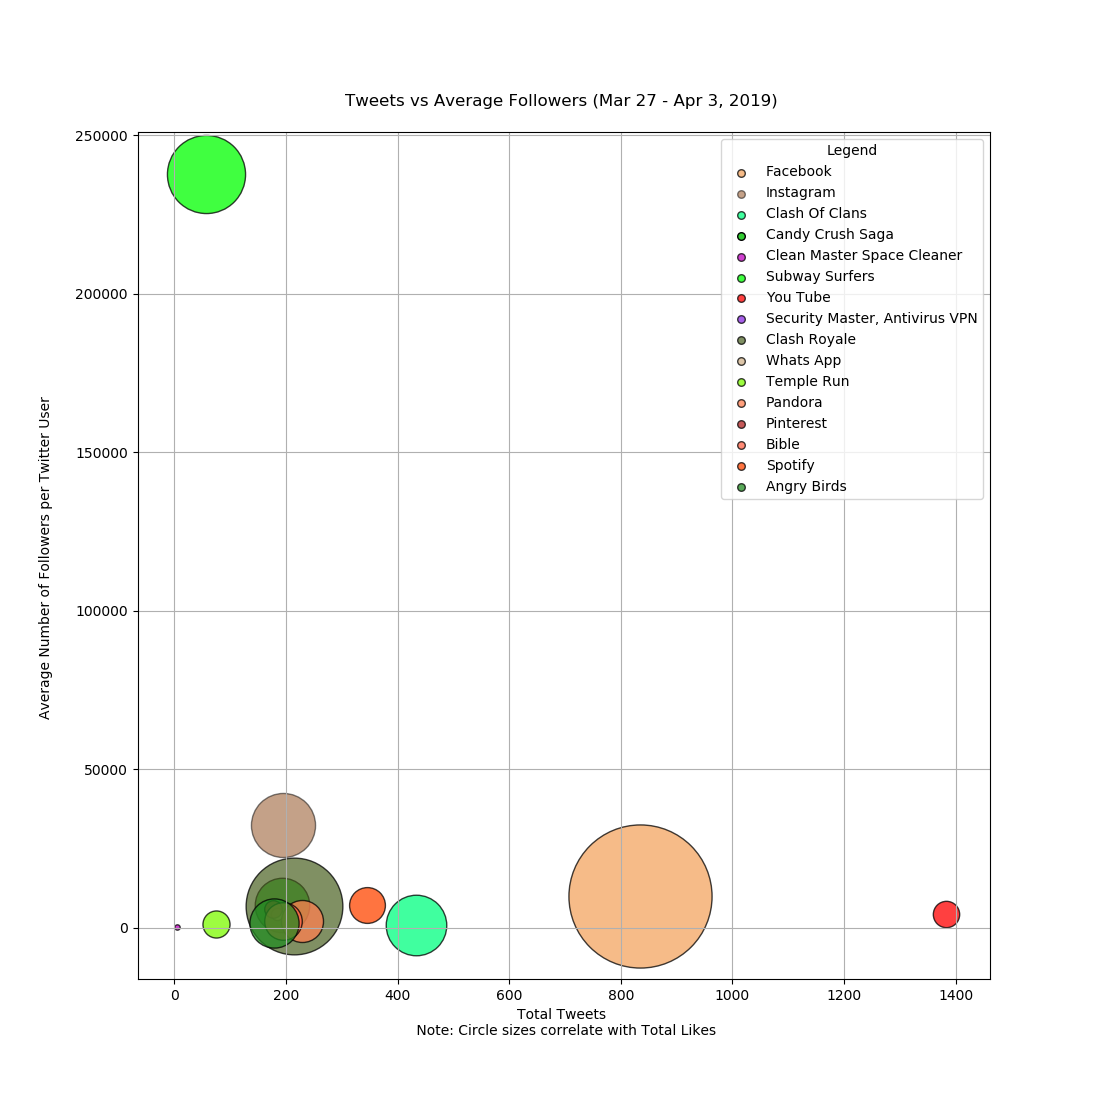

In [174]:
# Scatter Plot 1 - Tweets vs Average Followers vs Total Likes of the Top 10 Apps for both Google and Apple App Stores

fig, ax = plt.subplots(figsize=(11,11))


# Apps both on Google Play Store and Apple - 4 apps
facebook_plot = ax.scatter(facebook_total_tweets, facebook_avg_followers_ct, s=facebook_total_likes*15, color='sandybrown', label='Facebook', edgecolors='black', alpha=0.75)
instagram_plot= ax.scatter(instagram_total_tweets, instagram_avg_followers_ct, s=instagram_total_likes*15, color='saddlebrown', label='Instagram', edgecolors='black', alpha=0.5)
coc_plot= ax.scatter(coc_total_tweets, coc_avg_followers_ct, s=coc_total_likes*10, color='springgreen', label='Clash Of Clans', edgecolors='black', alpha=0.75)
candycrushsaga_plot= ax.scatter(candycrushsaga_total_tweets, candycrushsaga_avg_followers_ct, s=candycrushsaga_total_likes*5, color='limegreen', label='Candy Crush Saga', edgecolors='black')#, alpha=0.75)

# Google Play Store - 6 apps:
CleanMaster_plot= ax.scatter(CleanMaster_total_tweets, CleanMaster_avg_followers_ct, s=CleanMaster_total_likes*5, color='m', label='Clean Master Space Cleaner', edgecolors='black', alpha=0.75)
SubwaySurfers_plot= ax.scatter(SubwaySurfers_total_tweets, SubwaySurfers_avg_followers_ct, s=SubwaySurfers_total_likes*5, color='lime', label='Subway Surfers', edgecolors='black', alpha=0.75)
youtube_plot= ax.scatter(youtube_total_tweets, youtube_avg_followers_ct, s=youtube_total_likes*5, color='red', label='You Tube', edgecolors='black', alpha=0.75)
SecurityMaster_plot= ax.scatter(SecurityMaster_total_tweets, SecurityMaster_avg_followers_ct, s=SecurityMaster_total_likes*5, color='blueviolet', label='Security Master, Antivirus VPN', edgecolors='black', alpha=0.75)
ClashRoyale_plot= ax.scatter(ClashRoyale_total_tweets, ClashRoyale_avg_followers_ct, s=ClashRoyale_total_likes*5, color='darkolivegreen', label='Clash Royale', edgecolors='black', alpha=0.75)
whatsapp_plot= ax.scatter(whatsapp_total_tweets, whatsapp_avg_followers_ct, s=whatsapp_total_likes*5, color='tan', label='Whats App', edgecolors='black', alpha=0.75)

# Apple Apps Store - 6 apps
templerun_plot= ax.scatter(templerun_total_tweets, templerun_avg_followers_ct, s=templerun_total_likes*5, color='lawngreen', label='Temple Run', edgecolors='black', alpha=0.75)
pandora_plot= ax.scatter(pandora_total_tweets, pandora_avg_followers_ct, s=pandora_total_likes*5, color='coral', label='Pandora', edgecolors='black', alpha=0.75)
pinterest_plot= ax.scatter(pinterest_total_tweets, pinterest_avg_followers_ct, s=pinterest_total_likes*5, color='firebrick', label='Pinterest', edgecolors='black', alpha=0.75)
bible_plot= ax.scatter(bible_total_tweets, bible_avg_followers_ct, s=bible_total_likes*5, color='tomato', label='Bible', edgecolors='black', alpha=0.75)
spotify_plot= ax.scatter(spotify_total_tweets, spotify_avg_followers_ct, s=spotify_total_likes*5, color='orangered', label='Spotify', edgecolors='black', alpha=0.75)
angrybirds_plot= ax.scatter(angrybirds_total_tweets, angrybirds_avg_followers_ct, s=angrybirds_total_likes*5, color='forestgreen', label='Angry Birds', edgecolors='black', alpha=0.75)

# title and labels
plt.title("Tweets vs Average Followers (Mar 27 - Apr 3, 2019) \n")
plt.xlabel("Total Tweets \n Note: Circle sizes correlate with Total Likes" )
plt.ylabel("Average Number of Followers per Twitter User \n")

# set and format the legend
lgnd = plt.legend(title='Legend', loc="best")

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[3]._sizes = [30]
lgnd.legendHandles[4]._sizes = [30]
lgnd.legendHandles[5]._sizes = [30]
lgnd.legendHandles[6]._sizes = [30]
lgnd.legendHandles[7]._sizes = [30]
lgnd.legendHandles[8]._sizes = [30]
lgnd.legendHandles[9]._sizes = [30]
lgnd.legendHandles[10]._sizes = [30]
lgnd.legendHandles[11]._sizes = [30]
lgnd.legendHandles[12]._sizes = [30]
lgnd.legendHandles[13]._sizes = [30]
lgnd.legendHandles[14]._sizes = [30]
lgnd.legendHandles[15]._sizes = [30]


#grid lines and show
plt.grid()
plt.show()
#plt.savefig("./TWEETS_vs__AVG_followers_Scatter.png")

<IPython.core.display.Javascript object>


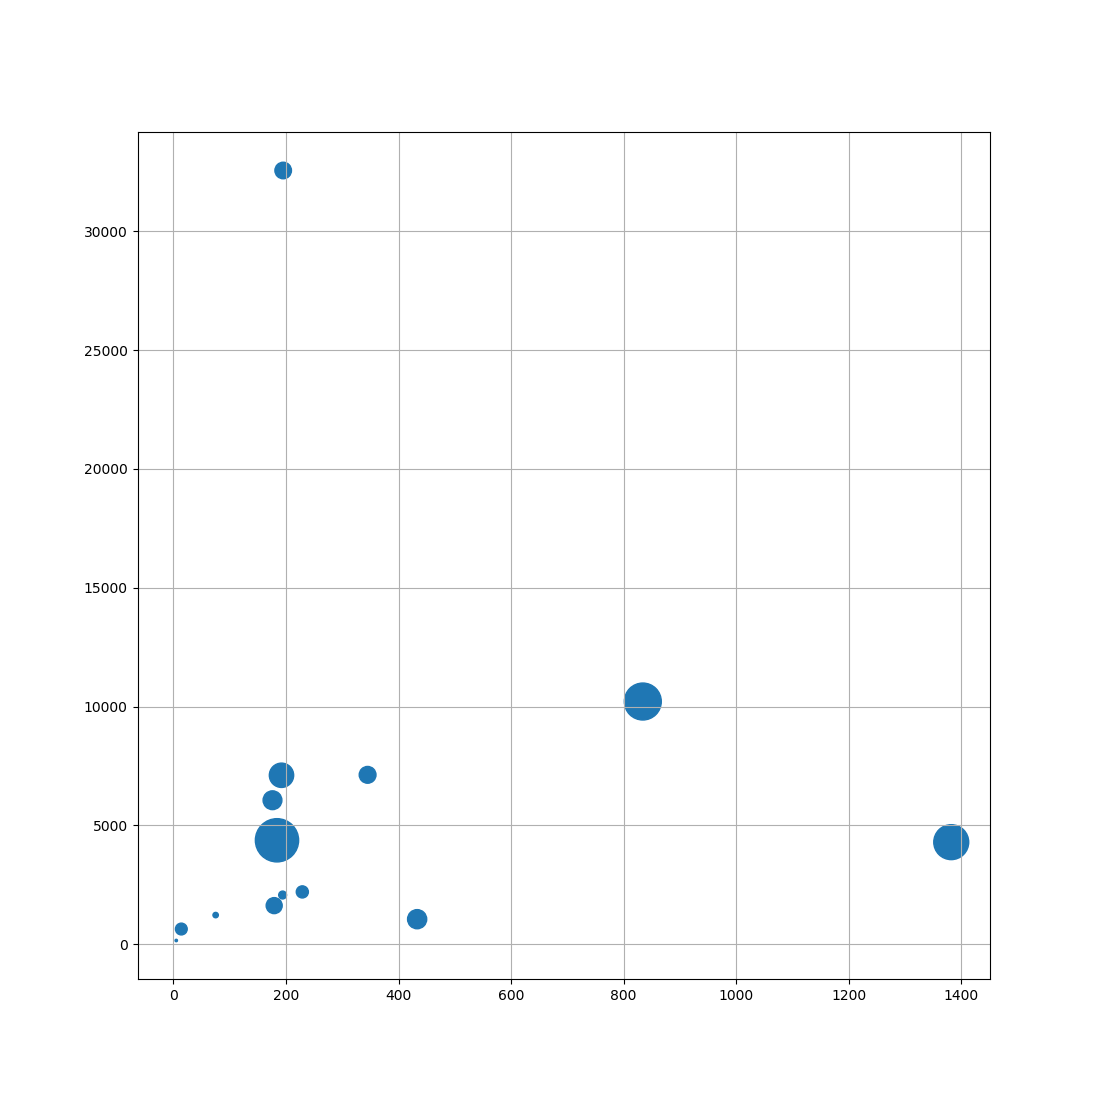

'# Apps both on Google Play Store and Apple - 4 apps\nfacebook_plot = ax.scatter(, , , color=\'sandybrown\', label=\'Facebook\', edgecolors=\'black\', alpha=0.75)\ninstagram_plot= ax.scatter(, , , color=\'saddlebrown\', label=\'Instagram\', edgecolors=\'black\', alpha=0.5)\ncoc_plot= ax.scatter(,, , color=\'springgreen\', label=\'Clash Of Clans\', edgecolors=\'black\', alpha=0.75)\ncandycrushsaga_plot= ax.scatter(,, , color=\'limegreen\', label=\'Candy Crush Saga\', edgecolors=\'black\')#, alpha=0.75)\n\n# Google Play Store - 6 apps:\nCleanMaster_plot= ax.scatter(,, , color=\'m\', label=\'Clean Master Space Cleaner\', edgecolors=\'black\', alpha=0.75)\nSubwaySurfers_plot= ax.scatter(,, , color=\'lime\', label=\'Subway Surfers\', edgecolors=\'black\', alpha=0.75)\nyoutube_plot= ax.scatter(,, , color=\'red\', label=\'You Tube\', edgecolors=\'black\', alpha=0.75)\nSecurityMaster_plot= ax.scatter(,, , color=\'blueviolet\', label=\'Security Master, Antivirus VPN\', edgecolors=\'black\', alp

In [176]:
SubwaySurfers_total_tweets, 
x = [facebook_total_tweets, instagram_total_tweets, coc_total_tweets,
     candycrushsaga_total_tweets, CleanMaster_total_tweets,
     youtube_total_tweets, SecurityMaster_total_tweets,
     ClashRoyale_total_tweets, whatsapp_total_tweets, templerun_total_tweets,
     pandora_total_tweets, pinterest_total_tweets, bible_total_tweets, spotify_total_tweets,
     angrybirds_total_tweets]
SubwaySurfers_avg_followers_ct, 
y = [facebook_avg_followers_ct, instagram_avg_followers_ct, coc_avg_followers_ct,
     candycrushsaga_avg_followers_ct, CleanMaster_avg_followers_ct,
     youtube_avg_followers_ct, SecurityMaster_avg_followers_ct,
     ClashRoyale_avg_followers_ct, whatsapp_avg_followers_ct, templerun_avg_followers_ct,
     pandora_avg_followers_ct, pinterest_avg_followers_ct, bible_avg_followers_ct, spotify_avg_followers_ct,
     angrybirds_avg_followers_ct]

"""
# Below this method doesn't work. Will go with brute force method.
s = [(facebook_total_likes*15), (instagram_total_likes*15), (coc_total_likes*10), (candycrushsaga_total_likes*5),
    (CleanMaster_total_likes*5), (SubwaySurfers_total_likes*5), (youtube_total_likes*5), (SecurityMaster_total_likes*5)
    (ClashRoyale_total_likes*5), (whatsapp_total_likes*5), (templerun_total_likes*5), (pandora_total_likes*5),
    (pinterest_total_likes*5), (bible_total_likes*5), (spotify_total_likes*5), (angrybirds_total_likes*5)]
"""
s = [facebook_total_likes, instagram_total_likes, coc_total_likes, candycrushsaga_total_likes,
    CleanMaster_total_likes, SubwaySurfers_total_likes, youtube_total_likes, SecurityMaster_total_likes,
    ClashRoyale_total_likes, whatsapp_total_likes, templerun_total_likes, pandora_total_likes,
    pinterest_total_likes, bible_total_likes, spotify_total_likes, angrybirds_total_likes]

colors = np.random.rand(16)



label = []
edgecolors = []
alpha = []

fig, ax = plt.subplots(figsize=(11,11))
ax.scatter(x, y, s)
plt.grid()
plt.show()

"""# Apps both on Google Play Store and Apple - 4 apps
facebook_plot = ax.scatter(, , , color='sandybrown', label='Facebook', edgecolors='black', alpha=0.75)
instagram_plot= ax.scatter(, , , color='saddlebrown', label='Instagram', edgecolors='black', alpha=0.5)
coc_plot= ax.scatter(,, , color='springgreen', label='Clash Of Clans', edgecolors='black', alpha=0.75)
candycrushsaga_plot= ax.scatter(,, , color='limegreen', label='Candy Crush Saga', edgecolors='black')#, alpha=0.75)

# Google Play Store - 6 apps:
CleanMaster_plot= ax.scatter(,, , color='m', label='Clean Master Space Cleaner', edgecolors='black', alpha=0.75)
SubwaySurfers_plot= ax.scatter(,, , color='lime', label='Subway Surfers', edgecolors='black', alpha=0.75)
youtube_plot= ax.scatter(,, , color='red', label='You Tube', edgecolors='black', alpha=0.75)
SecurityMaster_plot= ax.scatter(,, , color='blueviolet', label='Security Master, Antivirus VPN', edgecolors='black', alpha=0.75)
ClashRoyale_plot= ax.scatter(,, , color='darkolivegreen', label='Clash Royale', edgecolors='black', alpha=0.75)
whatsapp_plot= ax.scatter(,, , color='tan', label='Whats App', edgecolors='black', alpha=0.75)

# Apple Apps Store - 6 apps
templerun_plot= ax.scatter(, , , color='lawngreen', label='Temple Run', edgecolors='black', alpha=0.75)
pandora_plot= ax.scatter(, ,, color='coral', label='Pandora', edgecolors='black', alpha=0.75)
pinterest_plot= ax.scatter(, ,, color='firebrick', label='Pinterest', edgecolors='black', alpha=0.75)
bible_plot= ax.scatter(, , color='tomato', label='Bible', edgecolors='black', alpha=0.75)
spotify_plot= ax.scatter(, , color='orangered', label='Spotify', edgecolors='black', alpha=0.75)
angrybirds_plot= ax.scatter(,,, color='forestgreen', label='Angry Birds', edgecolors='black', alpha=0.75)

# title and labels
plt.title("Tweets vs Average Followers (Mar 27 - Apr 3, 2019) \n")
plt.xlabel("Total Tweets \n Note: Circle sizes correlate with Total Likes" )
plt.ylabel("Average Number of Followers per Twitter User \n")

"""


In [ ]:
# Scatter Plot 2 - Tweets vs ReTweets vs Likes

fig, ax = plt.subplots(figsize=(11,11))


# Apps both on Google Play Store and Apple - 4 apps
facebook_plot = ax.scatter(facebook_total_tweets, facebook_avg_retweets, s=facebook_total_likes*5, color='sandybrown', label='Facebook', edgecolors='black', alpha=0.75)
instagram_plot= ax.scatter(instagram_total_tweets, instagram_avg_retweets, s=instagram_total_likes*5, color='saddlebrown', label='Instagram', edgecolors='black', alpha=0.75)
coc_plot= ax.scatter(coc_total_tweets, coc_avg_retweets, s=coc_total_likes*5, color='springgreen', label='Clash Of Clans', edgecolors='black', alpha=0.75)
candycrushsaga_plot= ax.scatter(candycrushsaga_total_tweets, candycrushsaga_avg_retweets, s=candycrushsaga_total_likes*5, color='limegreen', label='Candy Crush Saga', edgecolors='black')#, alpha=0.75)

# Google Play Store - 6 apps:
CleanMaster_plot= ax.scatter(CleanMaster_total_tweets, CleanMaster_avg_retweets, s=CleanMaster_total_likes*5, color='m', label='Clean Master Space Cleaner', edgecolors='black', alpha=0.75)
SubwaySurfers_plot= ax.scatter(SubwaySurfers_total_tweets, SubwaySurfers_avg_retweets, s=SubwaySurfers_total_likes*5, color='lime', label='Subway Surfers', edgecolors='black', alpha=0.75)
youtube_plot= ax.scatter(youtube_total_tweets, youtube_avg_retweets, s=youtube_total_likes*5, color='red', label='You Tube', edgecolors='black', alpha=0.75)
SecurityMaster_plot= ax.scatter(SecurityMaster_total_tweets, SecurityMaster_avg_retweets, s=SecurityMaster_total_likes*5, color='blueviolet', label='Security Master, Antivirus VPN', edgecolors='black', alpha=0.75)
ClashRoyale_plot= ax.scatter(ClashRoyale_total_tweets, ClashRoyale_avg_retweets, s=ClashRoyale_total_likes*5, color='darkolivegreen', label='Clash Royale', edgecolors='black', alpha=0.75)
whatsapp_plot= ax.scatter(whatsapp_total_tweets, whatsapp_avg_retweets, s=whatsapp_total_likes*5, color='tan', label='Whats App', edgecolors='black', alpha=0.75)

# Apple Apps Store - 6 apps
templerun_plot= ax.scatter(templerun_total_tweets, templerun_avg_retweets, s=templerun_total_likes*5, color='lawngreen', label='Temple Run', edgecolors='black', alpha=0.75)
pandora_plot= ax.scatter(pandora_total_tweets, pandora_avg_retweets, s=pandora_total_likes*5, color='coral', label='Pandora', edgecolors='black', alpha=0.75)
pinterest_plot= ax.scatter(pinterest_total_tweets, pinterest_avg_retweets, s=pinterest_total_likes*5, color='firebrick', label='Pinterest', edgecolors='black', alpha=0.75)
bible_plot= ax.scatter(bible_total_tweets, bible_avg_retweets, s=bible_total_likes*5, color='tomato', label='Bible', edgecolors='black', alpha=0.75)
spotify_plot= ax.scatter(spotify_total_tweets, spotify_avg_retweets, s=spotify_total_likes*5, color='orangered', label='Spotify', edgecolors='black', alpha=0.75)
angrybirds_plot= ax.scatter(angrybirds_total_tweets, angrybirds_avg_retweets, s=angrybirds_total_likes*5, color='forestgreen', label='Angry Birds', edgecolors='black', alpha=0.75)

# title and labels
plt.title("Tweets vs ReTweets (Mar 27 - Apr 3, 2019) \n")
plt.xlabel("Total Tweets \n Note: Circle sizes correlate with Total Likes \n" )
plt.ylabel("Average Number of ReTweets per Twitter User \n")

# set and format the legend
lgnd = plt.legend(title='Legend', loc="best")

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[3]._sizes = [30]
lgnd.legendHandles[4]._sizes = [30]
lgnd.legendHandles[5]._sizes = [30]
lgnd.legendHandles[6]._sizes = [30]
lgnd.legendHandles[7]._sizes = [30]
lgnd.legendHandles[8]._sizes = [30]
lgnd.legendHandles[9]._sizes = [30]
lgnd.legendHandles[10]._sizes = [30]
lgnd.legendHandles[11]._sizes = [30]
lgnd.legendHandles[12]._sizes = [30]
lgnd.legendHandles[13]._sizes = [30]
lgnd.legendHandles[14]._sizes = [30]
lgnd.legendHandles[15]._sizes = [30]


#grid lines and show
plt.grid()
plt.show()
plt.savefig('./TWEETS_VS_RETWEETS_vs_LIKES_Scatter.png')

In [ ]:
# Scatter Plot 3 - Will not use this plot

fig, ax = plt.subplots(figsize=(8,8))


# Apps both on Google Play Store and Apple - 4 apps
facebook_plot = ax.scatter(facebook_avg_retweets, facebook_total_tweets, s=facebook_total_likes*5, color='blue', label='Facebook', edgecolors='red', alpha=0.75)
instagram_plot= ax.scatter(instagram_avg_retweets, instagram_total_tweets, s=instagram_total_likes*5, color='fuchsia', label='Instagram', edgecolors='red', alpha=0.75)
coc_plot= ax.scatter(coc_avg_retweets, coc_total_tweets, s=coc_total_likes*5, color='springgreen', label='Clash Of Clans', edgecolors='red', alpha=0.75)
candycrushsaga_plot= ax.scatter(candycrushsaga_avg_retweets, candycrushsaga_total_tweets, s=candycrushsaga_total_likes*5, color='black', label='Candy Crush Saga', edgecolors='red')#, alpha=0.75)

# Google Play Store - 6 apps:
CleanMaster_plot= ax.scatter(CleanMaster_avg_retweets, CleanMaster_total_tweets, s=CleanMaster_total_likes*5, color='olive', label='Clean Master Space Cleaner', edgecolors='lime', alpha=0.75)
SubwaySurfers_plot= ax.scatter(SubwaySurfers_avg_retweets, SubwaySurfers_total_tweets, s=SubwaySurfers_total_likes*5, color='plum', label='Subway Surfers', edgecolors='lime', alpha=0.75)
youtube_plot= ax.scatter(youtube_avg_retweets, youtube_total_tweets, s=youtube_total_likes*5, color='grey', label='You Tube', edgecolors='lime', alpha=0.75)
SecurityMaster_plot= ax.scatter(SecurityMaster_avg_retweets, SecurityMaster_total_tweets, s=SecurityMaster_total_likes*5, color='coral', label='Security Master, Antivirus VPN', edgecolors='lime', alpha=0.75)
ClashRoyale_plot= ax.scatter(ClashRoyale_avg_retweets, ClashRoyale_total_tweets, s=ClashRoyale_total_likes*5, color='orange', label='Clash Royale', edgecolors='lime', alpha=0.75)
whatsapp_plot= ax.scatter(whatsapp_avg_retweets, whatsapp_total_tweets, s=whatsapp_total_likes*5, color='green', label='Whats App', edgecolors='lime', alpha=0.75)

# Apple Apps Store - 6 apps
templerun_plot= ax.scatter(templerun_avg_retweets, templerun_total_tweets, s=templerun_total_likes*5, color='lawngreen', label='Temple Run', edgecolors='black', alpha=0.75)
pandora_plot= ax.scatter(pandora_avg_retweets, pandora_total_tweets, s=pandora_total_likes*5, color='cornflowerblue', label='Pandora', edgecolors='black', alpha=0.75)
pinterest_plot= ax.scatter(pinterest_avg_retweets, pinterest_total_tweets, s=pinterest_total_likes*5, color='firebrick', label='Pinterest', edgecolors='black', alpha=0.75)
bible_plot= ax.scatter(bible_avg_retweets, bible_total_tweets, s=bible_total_likes*5, color='brown', label='Bible', edgecolors='black', alpha=0.75)
spotify_plot= ax.scatter(spotify_avg_retweets, spotify_total_tweets, s=spotify_total_likes*5, color='darkgreen', label='Spotify', edgecolors='black', alpha=0.75)
angrybirds_plot= ax.scatter(angrybirds_avg_retweets, angrybirds_total_tweets, s=angrybirds_total_likes*5, color='salmon', label='Angry Birds', edgecolors='black', alpha=0.75)

# title and labels
plt.title("Tweets vs ReTweets (Mar 27 - Apr 3, 2019) \n")
plt.xlabel("Total Tweets \n Note: Circle sizes correlate with Total Likes \n" )
plt.ylabel("Average Number of ReTweets per Twitter User \n")

# set and format the legend
lgnd = plt.legend(title='Legend', loc="best")

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[3]._sizes = [30]
lgnd.legendHandles[4]._sizes = [30]
lgnd.legendHandles[5]._sizes = [30]
lgnd.legendHandles[6]._sizes = [30]
lgnd.legendHandles[7]._sizes = [30]
lgnd.legendHandles[8]._sizes = [30]
lgnd.legendHandles[9]._sizes = [30]
lgnd.legendHandles[10]._sizes = [30]
lgnd.legendHandles[11]._sizes = [30]
lgnd.legendHandles[12]._sizes = [30]
lgnd.legendHandles[13]._sizes = [30]
lgnd.legendHandles[14]._sizes = [30]
lgnd.legendHandles[15]._sizes = [30]


#grid lines and show
plt.grid()
plt.show()
#plt.savefig('./tweets_vs__avgfollowers_Scatter.png')

In [ ]:
# Hardcoding numbers from analysis done in Apple and Google Play Store Final Code Notebooks
# Avergage Apple, Google Ratings
facebook_avg_rating = (3.5 + 4.1)/2
instagram_avg_rating = (4.5 + 4.5)/2
coc_avg_rating = (4.5 + 4.6)/2
candycrushsaga_avg_rating = (4.5 + 4.4)/2

# Avergage Apple, Google Reviews
facebook_reviews = (2974676 + 78158306)/2
instagram_reviews = (2161558 + 66577446)/2
coc_reviews = (2130805 + 44893888)/2
candycrushsaga_reviews = (961794 + 22430188)/2

# Apple App Ratings
templerun_rating = 4.5
pandora_rating = 4.5
pinterest_rating = 4.5
bible_rating = 4.5
spotify_rating = 4.5
angrybirds_rating = 4.5

# Apple App Reviews
templerun_reviews = 1724546
pandora_reviews = 1126879
pinterest_reviews = 1061624
bible_reviews = 985920
spotify_reviews = 878563
angrybirds_reviews = 824451


# Google App Ratings
whatsapp_rating = 4.4
clean_master_rating = 4.7
subway_surfers_rating = 4.5
you_tube_rating = 4.3
security_master_rating = 4.7
clash_royale_rating = 4.6

# Google App Reviews
whatsapp_reviews = 69119316
clean_master_reviews = 42916526
subway_surfers_reviews = 27725352
you_tube_reviews = 25655305
security_master_reviews = 24900999
clash_royale_reviews = 23136735



In [ ]:
# Scatter Plot 5 - Tweets vs Ratings vs Likes - USE THIS ONE

fig, ax = plt.subplots(figsize=(11,11))


# Apps both on Google Play Store and Apple - 4 apps
facebook_plot = ax.scatter(facebook_total_tweets, facebook_avg_rating, s=facebook_total_likes*5, color='sandybrown', label='Facebook', edgecolors='black', alpha=0.75)
instagram_plot= ax.scatter(instagram_total_tweets, instagram_avg_rating, s=instagram_total_likes*5, color='saddlebrown', label='Instagram', edgecolors='black', alpha=0.75)
coc_plot= ax.scatter(coc_total_tweets, coc_avg_rating, s=coc_total_likes*5, color='springgreen', label='Clash Of Clans', edgecolors='black', alpha=0.75)
candycrushsaga_plot= ax.scatter(candycrushsaga_total_tweets, candycrushsaga_avg_rating, s=candycrushsaga_total_likes*5, color='limegreen', label='Candy Crush Saga', edgecolors='black')#, alpha=0.75)

# Google Play Store - 6 apps:
CleanMaster_plot= ax.scatter(CleanMaster_total_tweets, clean_master_rating, s=CleanMaster_total_likes*5, color='m', label='Clean Master Space Cleaner', edgecolors='black', alpha=0.75)
SubwaySurfers_plot= ax.scatter(SubwaySurfers_total_tweets, subway_surfers_rating, s=SubwaySurfers_total_likes*5, color='lime', label='Subway Surfers', edgecolors='black', alpha=0.75)
youtube_plot= ax.scatter(youtube_total_tweets, you_tube_rating, s=youtube_total_likes*5, color='red', label='You Tube', edgecolors='black', alpha=0.75)
SecurityMaster_plot= ax.scatter(SecurityMaster_total_tweets, security_master_rating, s=SecurityMaster_total_likes*5, color='blueviolet', label='Security Master, Antivirus VPN', edgecolors='black', alpha=0.75)
ClashRoyale_plot= ax.scatter(ClashRoyale_total_tweets, clash_royale_rating, s=ClashRoyale_total_likes*5, color='darkolivegreen', label='Clash Royale', edgecolors='black', alpha=0.75)
whatsapp_plot= ax.scatter(whatsapp_total_tweets, whatsapp_rating, s=whatsapp_total_likes*5, color='tan', label='Whats App', edgecolors='black', alpha=0.75)

# Apple Apps Store - 6 apps
templerun_plot= ax.scatter(templerun_total_tweets,templerun_rating, s=templerun_total_likes*5, color='lawngreen', label='Temple Run', edgecolors='black', alpha=0.75)
pandora_plot= ax.scatter(pandora_total_tweets, pandora_rating, s=pandora_total_likes*5, color='coral', label='Pandora', edgecolors='black', alpha=0.75)
pinterest_plot= ax.scatter(pinterest_total_tweets, pinterest_rating, s=pinterest_total_likes*5, color='firebrick', label='Pinterest', edgecolors='black', alpha=0.75)
bible_plot= ax.scatter(bible_total_tweets, bible_rating, s=bible_total_likes*5, color='tomato', label='Bible', edgecolors='black', alpha=0.75)
spotify_plot= ax.scatter(spotify_total_tweets, spotify_rating, s=spotify_total_likes*5, color='orangered', label='Spotify', edgecolors='black', alpha=0.75)
angrybirds_plot= ax.scatter(angrybirds_total_tweets, angrybirds_rating, s=angrybirds_total_likes*5, color='forestgreen', label='Angry Birds', edgecolors='black', alpha=0.75)

# title and labels
plt.title("Tweets vs Ratings (Mar 27 - Apr 3, 2019) \n")
plt.xlabel("Total Tweets \n Note: Circle sizes correlate with Total Likes \n" )
plt.ylabel("App Store User Ratings (Out of 5) \n")

# set and format the legend
lgnd = plt.legend(title='Legend', loc="best")

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[3]._sizes = [30]
lgnd.legendHandles[4]._sizes = [30]
lgnd.legendHandles[5]._sizes = [30]
lgnd.legendHandles[6]._sizes = [30]
lgnd.legendHandles[7]._sizes = [30]
lgnd.legendHandles[8]._sizes = [30]
lgnd.legendHandles[9]._sizes = [30]
lgnd.legendHandles[10]._sizes = [30]
lgnd.legendHandles[11]._sizes = [30]
lgnd.legendHandles[12]._sizes = [30]
lgnd.legendHandles[13]._sizes = [30]
lgnd.legendHandles[14]._sizes = [30]
lgnd.legendHandles[15]._sizes = [30]


#grid lines and show
plt.grid()
plt.show()
plt.savefig('./TWEETS_VS_RATINGSVS LIKES_Scatter.png')

In [ ]:
# Scatter Plot 5 - Tweets vs Reviews vs Ratings (size) - DO NOT USE

fig, ax = plt.subplots(figsize=(11,11))



# Apps both on Google Play Store and Apple - 4 apps
facebook_plot = ax.scatter(facebook_total_tweets, facebook_reviews, s=facebook_avg_rating*105, color='sandybrown', label='Facebook', edgecolors='black', alpha=0.75)
instagram_plot= ax.scatter(instagram_total_tweets, instagram_reviews, s=instagram_avg_rating*105, color='saddlebrown', label='Instagram', edgecolors='black', alpha=0.75)
coc_plot= ax.scatter(coc_total_tweets, coc_reviews, s=coc_avg_rating*105, color='springgreen', label='Clash Of Clans', edgecolors='black', alpha=0.75)
candycrushsaga_plot= ax.scatter(candycrushsaga_total_tweets, candycrushsaga_reviews, s=candycrushsaga_avg_rating*105, color='limegreen', label='Candy Crush Saga', edgecolors='black', alpha=0.75)

# Google Play Store - 6 apps:
CleanMaster_plot= ax.scatter(CleanMaster_total_tweets, clean_master_reviews, s=clean_master_rating*105, color='m', label='Clean Master Space Cleaner', edgecolors='black', alpha=0.75)
SubwaySurfers_plot= ax.scatter(SubwaySurfers_total_tweets, subway_surfers_reviews, s=subway_surfers_rating*105, color='lime', label='Subway Surfers', edgecolors='black', alpha=0.75)
youtube_plot= ax.scatter(youtube_total_tweets, you_tube_reviews, s=you_tube_rating*105, color='red', label='You Tube', edgecolors='black', alpha=0.75)
SecurityMaster_plot= ax.scatter(SecurityMaster_total_tweets, security_master_reviews, s=security_master_rating*105, color='blueviolet', label='Security Master, Antivirus VPN', edgecolors='black', alpha=0.75)
ClashRoyale_plot= ax.scatter(ClashRoyale_total_tweets, clash_royale_reviews, s=clash_royale_rating*105, color='darkolivegreen', label='Clash Royale', edgecolors='black', alpha=0.75)
whatsapp_plot= ax.scatter(whatsapp_total_tweets, whatsapp_reviews, s=whatsapp_rating*105, color='tan', label='Whats App', edgecolors='lime', alpha=0.75)

# Apple Apps Store - 6 apps
templerun_plot= ax.scatter(templerun_total_tweets,templerun_reviews, s=templerun_rating*105, color='lawngreen', label='Temple Run', edgecolors='black', alpha=0.75)
pandora_plot= ax.scatter(pandora_total_tweets, pandora_reviews, s=pandora_rating*105, color='coral', label='Pandora', edgecolors='black', alpha=0.75)
pinterest_plot= ax.scatter(pinterest_total_tweets, pinterest_reviews, s=pinterest_rating*105, color='firebrick', label='Pinterest', edgecolors='black', alpha=0.75)
bible_plot= ax.scatter(bible_total_tweets, bible_reviews, s=bible_rating*105, color='tomato', label='Bible', edgecolors='black', alpha=0.75)
spotify_plot= ax.scatter(spotify_total_tweets, spotify_reviews, s=spotify_rating*105, color='orangered', label='Spotify', edgecolors='black', alpha=0.75)
angrybirds_plot= ax.scatter(angrybirds_total_tweets, angrybirds_reviews, s=angrybirds_rating*105, color='forestgreen', label='Angry Birds', edgecolors='black', alpha=0.75)

# title and labels
plt.title("Tweets vs Reviews (Mar 27 - Apr 3, 2019) \n")
plt.xlabel("Total Tweets \n Note: Circle sizes correlate with App Ratings \n" )
plt.ylabel("App Store Reviews in Millions \n")

# set and format the legend
lgnd = plt.legend(title='Legend', loc="best")

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[3]._sizes = [30]
lgnd.legendHandles[4]._sizes = [30]
lgnd.legendHandles[5]._sizes = [30]
lgnd.legendHandles[6]._sizes = [30]
lgnd.legendHandles[7]._sizes = [30]
lgnd.legendHandles[8]._sizes = [30]
lgnd.legendHandles[9]._sizes = [30]
lgnd.legendHandles[10]._sizes = [30]
lgnd.legendHandles[11]._sizes = [30]
lgnd.legendHandles[12]._sizes = [30]
lgnd.legendHandles[13]._sizes = [30]
lgnd.legendHandles[14]._sizes = [30]
lgnd.legendHandles[15]._sizes = [30]


#grid lines and show
plt.grid()
plt.show()
#plt.savefig('./tweets_vs__avgfollowers_Scatter.png')

In [ ]:
# Scatter Plot 6 - Tweets vs Reviews vs Likes (size) -USE THIS ONE

fig, ax = plt.subplots(figsize=(11,11))



# Apps both on Google Play Store and Apple - 4 apps
facebook_plot = ax.scatter(facebook_total_tweets, facebook_reviews, s=facebook_total_likes*5, color='sandybrown', label='Facebook', edgecolors='black', alpha=0.75)
instagram_plot= ax.scatter(instagram_total_tweets, instagram_reviews, s=instagram_total_likes*5, color='saddlebrown', label='Instagram', edgecolors='black', alpha=0.75)
coc_plot= ax.scatter(coc_total_tweets, coc_reviews, s=coc_total_likes*5, color='springgreen', label='Clash Of Clans', edgecolors='black', alpha=0.75)
candycrushsaga_plot= ax.scatter(candycrushsaga_total_tweets, candycrushsaga_reviews, s=candycrushsaga_total_likes*5, color='limegreen', label='Candy Crush Saga', edgecolors='black', alpha=0.75)

# Google Play Store - 6 apps:
CleanMaster_plot= ax.scatter(CleanMaster_total_tweets, clean_master_reviews, s=CleanMaster_total_likes*5, color='m', label='Clean Master Space Cleaner', edgecolors='black', alpha=0.75)
SubwaySurfers_plot= ax.scatter(SubwaySurfers_total_tweets, subway_surfers_reviews, s=SubwaySurfers_total_likes*5, color='lime', label='Subway Surfers', edgecolors='black', alpha=0.75)
youtube_plot= ax.scatter(youtube_total_tweets, you_tube_reviews, s=youtube_total_likes*5, color='red', label='You Tube', edgecolors='black', alpha=0.75)
SecurityMaster_plot= ax.scatter(SecurityMaster_total_tweets, security_master_reviews, s=SecurityMaster_total_likes*5, color='blueviolet', label='Security Master, Antivirus VPN', edgecolors='black', alpha=0.75)
ClashRoyale_plot= ax.scatter(ClashRoyale_total_tweets, clash_royale_reviews, s=ClashRoyale_total_likes*5, color='darkolivegreen', label='Clash Royale', edgecolors='black', alpha=0.75)
whatsapp_plot= ax.scatter(whatsapp_total_tweets, whatsapp_reviews, s=whatsapp_total_likes*5, color='tan', label='Whats App', edgecolors='black', alpha=0.75)

# Apple Apps Store - 6 apps
templerun_plot= ax.scatter(templerun_total_tweets, templerun_reviews, s=templerun_total_likes*5, color='lawngreen', label='Temple Run', edgecolors='black', alpha=0.75)
pandora_plot= ax.scatter(pandora_total_tweets, pandora_reviews, s=pandora_total_likes*5, color='coral', label='Pandora', edgecolors='black', alpha=0.75)
pinterest_plot= ax.scatter(pinterest_total_tweets, pinterest_reviews, s=pinterest_total_likes*5, color='firebrick', label='Pinterest', edgecolors='black', alpha=0.75)
bible_plot= ax.scatter(bible_total_tweets, bible_reviews, s=bible_total_likes*5, color='tomato', label='Bible', edgecolors='black', alpha=0.75)
spotify_plot= ax.scatter(spotify_total_tweets, spotify_reviews, s=spotify_total_likes*5, color='orangered', label='Spotify', edgecolors='black', alpha=0.75)
angrybirds_plot= ax.scatter(angrybirds_total_tweets, angrybirds_reviews, s=angrybirds_total_likes*5, color='forestgreen', label='Angry Birds', edgecolors='black', alpha=0.75)

# title and labels
plt.title("Tweets vs Reviews (Mar 27 - Apr 3, 2019) \n")
plt.xlabel("Total Tweets \n Note: Circle sizes correlate with Likes \n" )
plt.ylabel("App Store Reviews in Millions \n")

# set and format the legend
lgnd = plt.legend(title='Legend', loc="best")

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[3]._sizes = [30]
lgnd.legendHandles[4]._sizes = [30]
lgnd.legendHandles[5]._sizes = [30]
lgnd.legendHandles[6]._sizes = [30]
lgnd.legendHandles[7]._sizes = [30]
lgnd.legendHandles[8]._sizes = [30]
lgnd.legendHandles[9]._sizes = [30]
lgnd.legendHandles[10]._sizes = [30]
lgnd.legendHandles[11]._sizes = [30]
lgnd.legendHandles[12]._sizes = [30]
lgnd.legendHandles[13]._sizes = [30]
lgnd.legendHandles[14]._sizes = [30]
lgnd.legendHandles[15]._sizes = [30]


#grid lines and show
plt.grid()
plt.show()
plt.savefig('./TWEETS_VS_REVIEWS_VSLIKES_Scatter.png')

In [ ]:
# Scatter Plot 5 - Tweets vs Reviews vs Likes (size) - Need to do

fig, ax = plt.subplots(figsize=(8,8))


# Apps both on Google Play Store and Apple - 4 apps
facebook_plot = ax.scatter(facebook_avg_retweets, facebook_total_tweets, s=facebook_total_likes*5, color='blue', label='Facebook', edgecolors='red', alpha=0.75)
instagram_plot= ax.scatter(instagram_avg_retweets, instagram_total_tweets, s=instagram_total_likes*5, color='fuchsia', label='Instagram', edgecolors='red', alpha=0.75)
coc_plot= ax.scatter(coc_avg_retweets, coc_total_tweets, s=coc_total_likes*5, color='springgreen', label='Clash Of Clans', edgecolors='red', alpha=0.75)
candycrushsaga_plot= ax.scatter(candycrushsaga_avg_retweets, candycrushsaga_total_tweets, s=candycrushsaga_total_likes*5, color='black', label='Candy Crush Saga', edgecolors='red')#, alpha=0.75)

# Google Play Store - 6 apps:
CleanMaster_plot= ax.scatter(CleanMaster_avg_retweets, CleanMaster_total_tweets, s=CleanMaster_total_likes*5, color='olive', label='Clean Master Space Cleaner', edgecolors='lime', alpha=0.75)
SubwaySurfers_plot= ax.scatter(SubwaySurfers_avg_retweets, SubwaySurfers_total_tweets, s=SubwaySurfers_total_likes*5, color='plum', label='Subway Surfers', edgecolors='lime', alpha=0.75)
youtube_plot= ax.scatter(youtube_avg_retweets, youtube_total_tweets, s=youtube_total_likes*5, color='grey', label='You Tube', edgecolors='lime', alpha=0.75)
SecurityMaster_plot= ax.scatter(SecurityMaster_avg_retweets, SecurityMaster_total_tweets, s=SecurityMaster_total_likes*5, color='coral', label='Security Master, Antivirus VPN', edgecolors='lime', alpha=0.75)
ClashRoyale_plot= ax.scatter(ClashRoyale_avg_retweets, ClashRoyale_total_tweets, s=ClashRoyale_total_likes*5, color='orange', label='Clash Royale', edgecolors='lime', alpha=0.75)
whatsapp_plot= ax.scatter(whatsapp_avg_retweets, whatsapp_total_tweets, s=whatsapp_total_likes*5, color='green', label='Whats App', edgecolors='lime', alpha=0.75)

# Apple Apps Store - 6 apps
templerun_plot= ax.scatter(templerun_avg_retweets, templerun_total_tweets, s=templerun_total_likes*5, color='lawngreen', label='Temple Run', edgecolors='black', alpha=0.75)
pandora_plot= ax.scatter(pandora_avg_retweets, pandora_total_tweets, s=pandora_total_likes*5, color='cornflowerblue', label='Pandora', edgecolors='black', alpha=0.75)
pinterest_plot= ax.scatter(pinterest_avg_retweets, pinterest_total_tweets, s=pinterest_total_likes*5, color='firebrick', label='Pinterest', edgecolors='black', alpha=0.75)
bible_plot= ax.scatter(bible_avg_retweets, bible_total_tweets, s=bible_total_likes*5, color='brown', label='Bible', edgecolors='black', alpha=0.75)
spotify_plot= ax.scatter(spotify_avg_retweets, spotify_total_tweets, s=spotify_total_likes*5, color='darkgreen', label='Spotify', edgecolors='black', alpha=0.75)
angrybirds_plot= ax.scatter(angrybirds_avg_retweets, angrybirds_total_tweets, s=angrybirds_total_likes*5, color='salmon', label='Angry Birds', edgecolors='black', alpha=0.75)

# title and labels
plt.title("Tweets vs ReTweets (Mar 27 - Apr 3, 2019) \n")
plt.xlabel("Avg ReTweets \n Note: Circle sizes correlate with Total Likes \n" )
plt.ylabel("Total Tweets \n")

# set and format the legend
lgnd = plt.legend(title='Legend', loc="best")

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[3]._sizes = [30]
lgnd.legendHandles[4]._sizes = [30]
lgnd.legendHandles[5]._sizes = [30]
lgnd.legendHandles[6]._sizes = [30]
lgnd.legendHandles[7]._sizes = [30]
lgnd.legendHandles[8]._sizes = [30]
lgnd.legendHandles[9]._sizes = [30]
lgnd.legendHandles[10]._sizes = [30]
lgnd.legendHandles[11]._sizes = [30]
lgnd.legendHandles[12]._sizes = [30]
lgnd.legendHandles[13]._sizes = [30]
lgnd.legendHandles[14]._sizes = [30]
lgnd.legendHandles[15]._sizes = [30]


#grid lines and show
plt.grid()
plt.show()
#plt.savefig('./tweets_vs__avgfollowers_Scatter.png')